**Bengisu Doğa Gök** - 117321,
**Lana Bencik** - 122363,
**Ivana Jarni** - 122342

# <center>**Computer-Aided Diagnosis MIDTerm Proj**</center>

### **Machine Learning classifiers for Alzheimer Disease based on MR Imaging Radiomics of the left hippocampus**

Datasets: 3 [MS Excel files](https://elearning.ua.pt/mod/folder/view.php?id=1095532)

*   200 Control vs 200 Alzheimer cases (WorkHipoEsqDACN.xlsx)

*   200 Control vs 200 Mild Cognitive Impairment (MCI) cases (WorkHipoEsqCNMCI.xlsx)
*   200 Mild Cognitive Impairment (MCI) vs 200 Alzheimer cases (WorkDAMCI.xlsx)


**Data collection**

Each dataset is composed of radiomics features obtained by image analysis of left hippocampus ROIS after subcortical segmentation of neuro MR studies avalialable at the [ADNI](https://adni.loni.usc.edu/) repository.
Image segmentation was performed by the [VolBrain](https://www.volbrain.upv.es/) online brain volumetry platform.

Radiomics features were computed by the [LifeX](https://www.lifexsoft.org/) software tool.



# **Objectives**
Explore numerical features for each dataset.

Compare the binary classification performance of:

*   K-NN
*   Support Vector Machines
*   Neural Networks
*   Random Forests

Build a data frame with 600 instances: 200 Control, 200 MCI and 200 Alzheimer Disease.
Try to find the best model for a 3 class classification task.

# Deliverables
Commented jupyter notebook(s)

*   Data preparation
*   Feature Selection
*   Training and validation approaches
*   Performance evaluation
*   Feature Ranking


### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

### Datasets cleaning and preparation

In [2]:
# Reading the datasets
dacn = pd.read_excel('WorkHipoEsqDACN.xlsx')
print(dacn.head())

cnmci = pd.read_excel('WorkHipoEsqCNMCI.xlsx')
print(cnmci.head())

damci = pd.read_excel('WorkHipoEsqDAMCI.xlsx')
print(damci.head())

   DA  Age  Sex  CONVENTIONAL_min   CONVENTIONAL_mean  CONVENTIONAL_std  \
0   1   73    1         143.976944         193.036763         18.728535   
1   1   74    1         146.203033         193.219434         18.894705   
2   1   74    1         119.456741         180.084749         25.137809   
3   1   74    1         140.723282         191.422071         19.740543   
4   1   67    1         154.285492         195.282236         18.942624   

   CONVENTIONAL_max  CONVENTIONAL_Skewness  CONVENTIONAL_Kurtosis  \
0        268.521362               0.387954               3.881567   
1        264.507874               0.372894               3.763369   
2        268.183777               0.169002               2.905132   
3        258.418243               0.262619               3.594804   
4        269.194366               0.591041               3.673427   

   CONVENTIONAL_ExcessKurtosis  ...  GLZLM_LZE  GLZLM_LGZE  GLZLM_HGZE  \
0                     0.881567  ...  31.988163    0.012026  

Checking for NaN values.

In [3]:
nan_values = dacn.isna().sum()
print(nan_values)

DA                                  0
Age                                 0
Sex                                 0
CONVENTIONAL_min                    0
CONVENTIONAL_mean                   0
CONVENTIONAL_std                    0
CONVENTIONAL_max                    0
CONVENTIONAL_Skewness               0
CONVENTIONAL_Kurtosis               0
CONVENTIONAL_ExcessKurtosis         0
DISCRETIZED_min                     0
DISCRETIZED_mean                    0
DISCRETIZED_std                     0
DISCRETIZED_max                     0
DISCRETIZED_Skewness                0
DISCRETIZED_Kurtosis                0
DISCRETIZED_ExcessKurtosis          0
DISCRETIZED_HISTO_Skewness          0
DISCRETIZED_HISTO_Kurtosis          0
DISCRETIZED_HISTO_ExcessKurtosis    0
DISCRETIZED_HISTO_Entropy_log10     0
DISCRETIZED_HISTO_Entropy_log2      0
DISCRETIZED_HISTO_Energy            0
SHAPE_Volumeml                      0
SHAPE_Sphericity                    0
SHAPE_Surface                       0
SHAPE_Compac

In [4]:
nan_values2 = cnmci.isna().sum()
print(nan_values2)

MCI                  0
Age                  0
Sex                  0
CONVENTIONAL_min     0
CONVENTIONAL_mean    0
                    ..
GLZLM_LZLGE          0
GLZLM_LZHGE          0
GLZLM_GLNU           0
GLZLM_ZLNU           0
GLZLM_ZP             0
Length: 61, dtype: int64


In [6]:
nan_values3 = damci.isna().sum()
print(nan_values3)

DAVSMCI              0
Age                  0
Sex                  0
CONVENTIONAL_min     0
CONVENTIONAL_mean    0
                    ..
GLZLM_LZLGE          0
GLZLM_LZHGE          0
GLZLM_GLNU           0
GLZLM_ZLNU           0
GLZLM_ZP             0
Length: 61, dtype: int64


No need to drop any rows or columns because there are no NaN values.

In [7]:
print(len(dacn))

print(len(cnmci))

print(len(damci))

400
400
400


#### Separating features from a target value

In [8]:
X_dacn = dacn.drop(columns=['DA'])
y_dacn = dacn['DA']

X_cnmci = cnmci.drop(columns=['MCI'])
y_cnmci = cnmci['MCI']

X_damci = damci.drop(columns=['DAVSMCI'])
y_damci = damci['DAVSMCI']

### Dropping duplicates

In [9]:
dacn.drop_duplicates(inplace=True)
print(len(dacn))

cnmci.drop_duplicates(inplace=True)
print(len(cnmci))

damci.drop_duplicates(inplace=True)
print(len(damci))

400
400
400


There are no duplicates.

### Data visualization

Text(0, 0.5, 'Number of people')

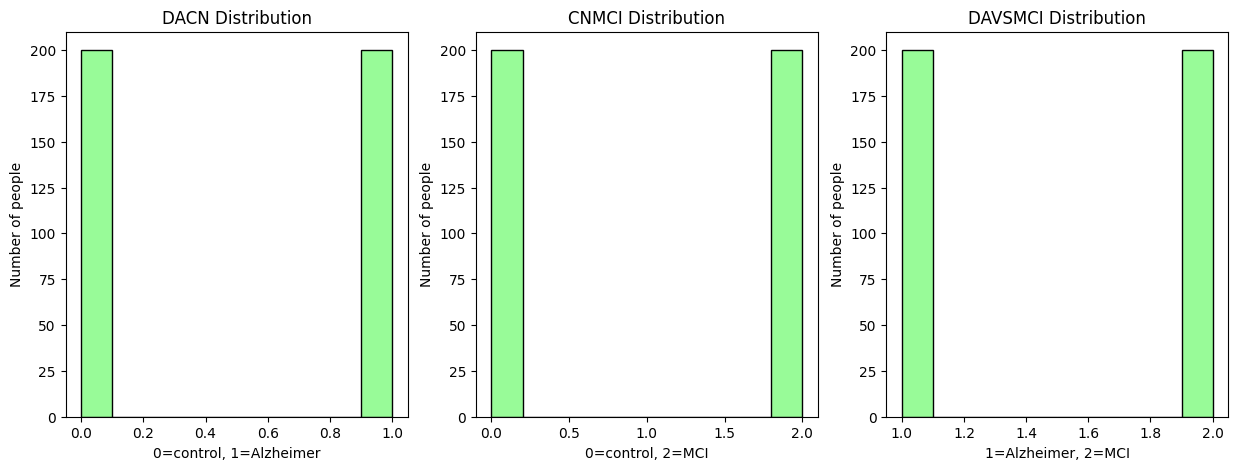

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
alzheimer_cases = dacn['DA']
plt.hist(alzheimer_cases, edgecolor="black", color='palegreen')
plt.title('DACN Distribution')
plt.xlabel('0=control, 1=Alzheimer')
plt.ylabel('Number of people')

plt.subplot(1,3,2)
mci_cases = cnmci['MCI']
plt.hist(mci_cases, edgecolor="black", color='palegreen')
plt.title('CNMCI Distribution')
plt.xlabel('0=control, 2=MCI')
plt.ylabel('Number of people')

plt.subplot(1,3,3)
mci_vs_alz = damci['DAVSMCI']
plt.hist(mci_vs_alz, edgecolor="black", color='palegreen')
plt.title('DAVSMCI Distribution')
plt.xlabel('1=Alzheimer, 2=MCI')
plt.ylabel('Number of people')

All the datasets are balanced, so there is no need to worry about balancing.

Text(0.5, 0, '0=man, 1=woman')

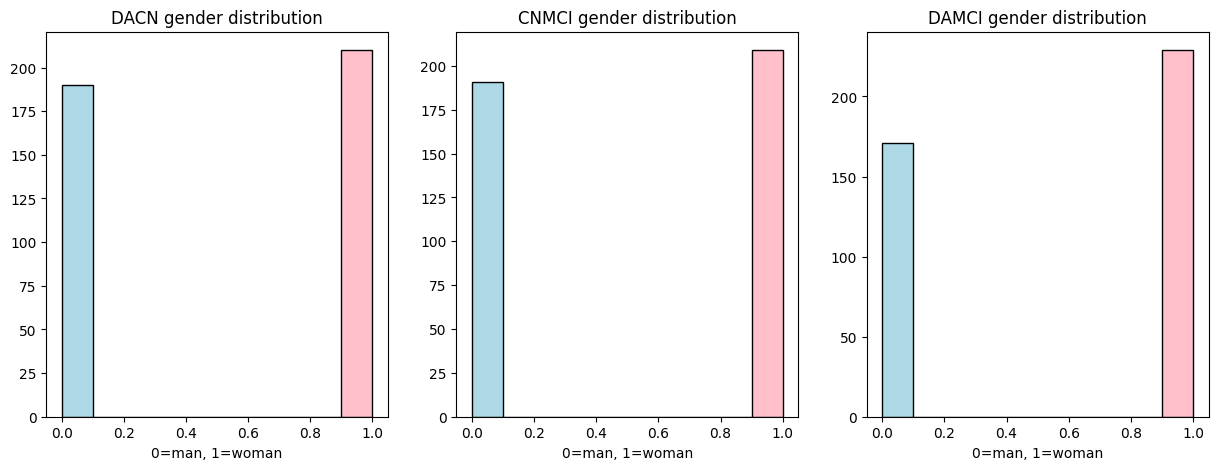

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
gender_distribution_dacn =dacn['Sex']
n, bins, patches = plt.hist(gender_distribution_dacn, edgecolor='black')
patches[0].set_facecolor('lightblue')
patches[-1].set_facecolor('pink')
plt.title('DACN gender distribution')
plt.xlabel('0=man, 1=woman')

plt.subplot(1,3,2)
gender_distribution_cnmci =cnmci['Sex']
n, bins, patches = plt.hist(gender_distribution_cnmci, edgecolor='black')
patches[0].set_facecolor('lightblue')
patches[-1].set_facecolor('pink')
plt.title('CNMCI gender distribution')
plt.xlabel('0=man, 1=woman')

plt.subplot(1,3,3)
gender_distribution_damci =damci['Sex']
n, bins, patches = plt.hist(gender_distribution_damci, edgecolor='black')
patches[0].set_facecolor('lightblue')
patches[-1].set_facecolor('pink')
plt.title('DAMCI gender distribution')
plt.xlabel('0=man, 1=woman')

Text(0.5, 0, '0=man, 1=woman')

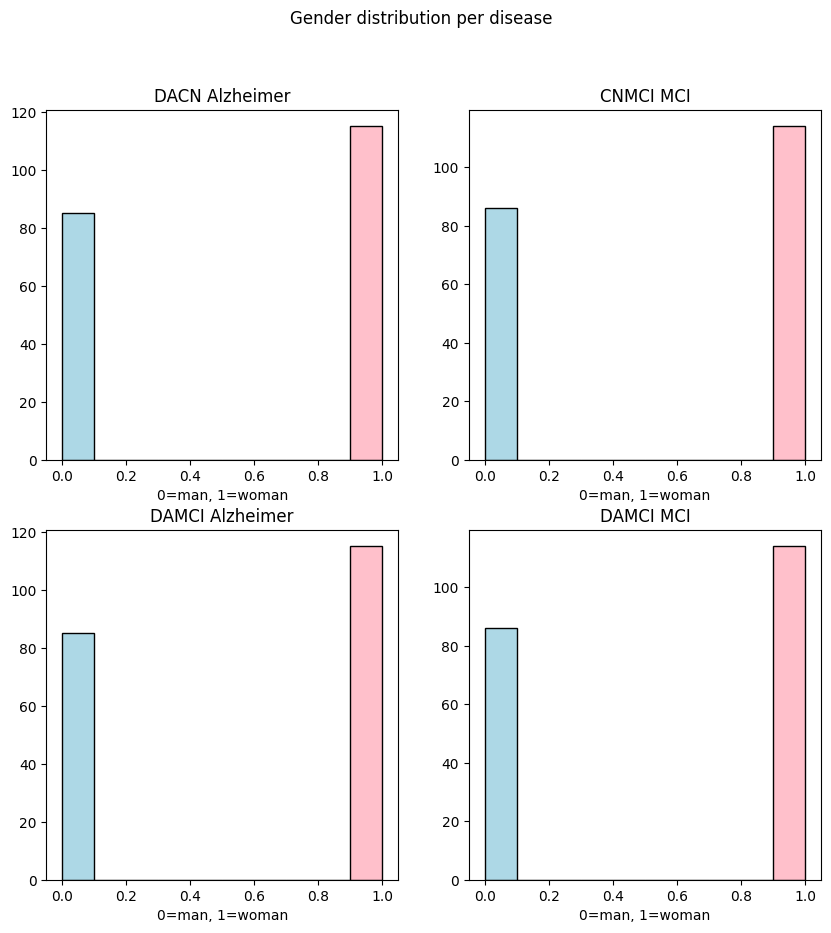

In [12]:
plt.figure(figsize=(10, 10))
plt.suptitle('Gender distribution per disease')

plt.subplot(2,2,1)
distribution_Alz_dacn=dacn[dacn['DA'] == 1]
gender_distribution_Alz_dacn = distribution_Alz_dacn['Sex']
n, bins, patches = plt.hist(gender_distribution_Alz_dacn, edgecolor='black')
patches[0].set_facecolor('lightblue')
patches[-1].set_facecolor('pink')
plt.title('DACN Alzheimer')
plt.xlabel('0=man, 1=woman')

plt.subplot(2,2,2)
distribution_MCI_cnmci=cnmci[cnmci['MCI'] == 2]
gender_distribution_MCI_cnmci = distribution_MCI_cnmci['Sex']
n, bins, patches = plt.hist(gender_distribution_MCI_cnmci, edgecolor='black')
patches[0].set_facecolor('lightblue')
patches[-1].set_facecolor('pink')
plt.title('CNMCI MCI')
plt.xlabel('0=man, 1=woman')

plt.subplot(2,2,3)
distribution_Alz_damci=damci[damci['DAVSMCI'] == 1]
gender_distribution_Alz_damci = distribution_Alz_damci['Sex']
n, bins, patches = plt.hist(gender_distribution_Alz_damci, edgecolor='black')
patches[0].set_facecolor('lightblue')
patches[-1].set_facecolor('pink')
plt.title('DAMCI Alzheimer')
plt.xlabel('0=man, 1=woman')

plt.subplot(2,2,4)
distribution_MCI_damci=damci[damci['DAVSMCI'] == 2]
gender_distribution_MCI_damci = distribution_MCI_damci['Sex']
n, bins, patches = plt.hist(gender_distribution_MCI_damci, edgecolor='black')
patches[0].set_facecolor('lightblue')
patches[-1].set_facecolor('pink')
plt.title('DAMCI MCI')
plt.xlabel('0=man, 1=woman')

Text(0.5, 1.0, 'DAMCI age distribution')

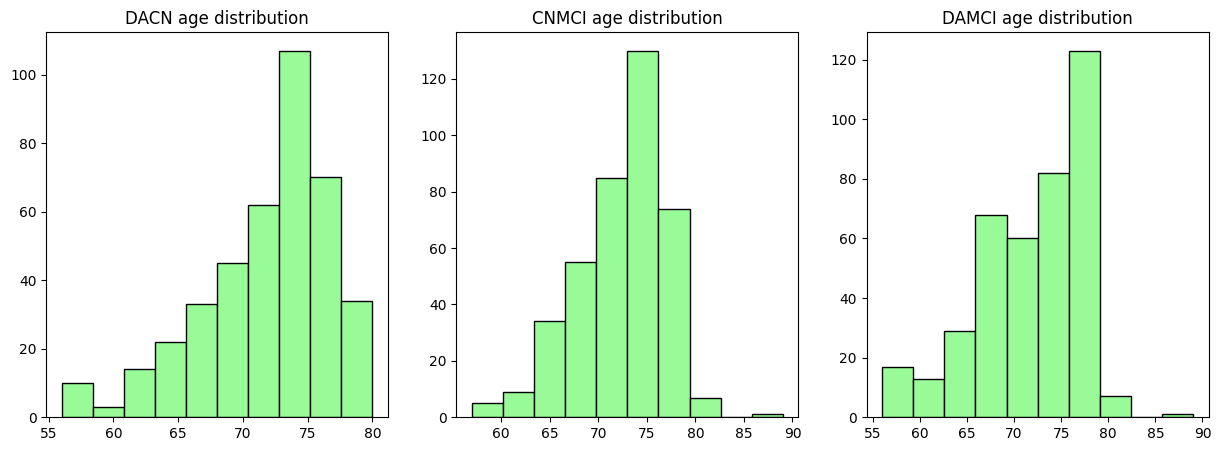

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
age_distribution_dacn=dacn['Age']
plt.hist(age_distribution_dacn, edgecolor='black', color='palegreen')
plt.title('DACN age distribution')

plt.subplot(1,3,2)
age_distribution_cnmci =cnmci['Age']
plt.hist(age_distribution_cnmci, edgecolor='black', color='palegreen')
plt.title('CNMCI age distribution')

plt.subplot(1,3,3)
age_distribution_damci =damci['Age']
plt.hist(age_distribution_damci, edgecolor='black', color='palegreen')
plt.title('DAMCI age distribution')

Text(0.5, 1.0, 'DAMCI')

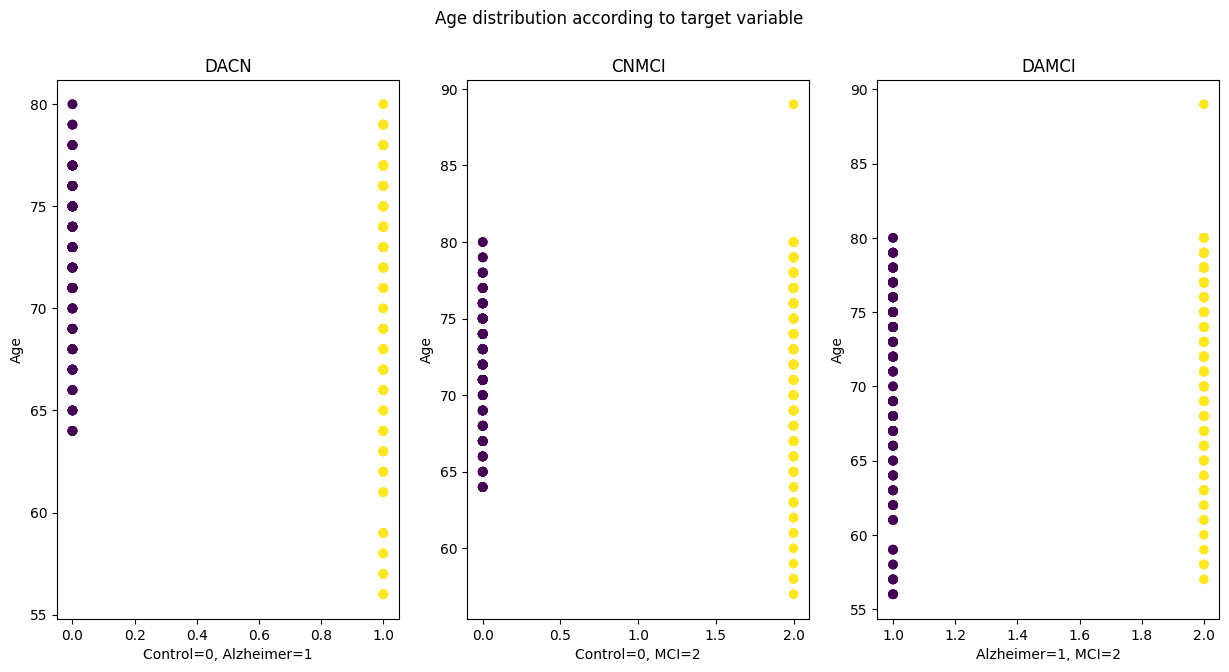

In [14]:
plt.figure(figsize=(15, 7))
plt.suptitle('Age distribution according to target variable')

plt.subplot(1,3,1)
plt.scatter(dacn['DA'], dacn['Age'], c=y_dacn, cmap='viridis')
plt.xlabel('Control=0, Alzheimer=1')
plt.ylabel('Age')
plt.title('DACN')

plt.subplot(1,3,2)
plt.scatter(cnmci['MCI'], cnmci['Age'], c=y_cnmci, cmap='viridis')
plt.xlabel('Control=0, MCI=2')
plt.ylabel('Age')
plt.title('CNMCI')

plt.subplot(1,3,3)
plt.scatter(damci['DAVSMCI'], damci['Age'], c=y_damci, cmap='viridis')
plt.xlabel('Alzheimer=1, MCI=2')
plt.ylabel('Age')
plt.title('DAMCI')

In [15]:
#Correlation matrices
correlation_matrix_dacn = X_dacn.corr()
correlation_matrix_cnmci = X_cnmci.corr()
correlation_matrix_damci = X_damci.corr()

Text(0.5, 1.0, 'Correlation Matrix DACN')

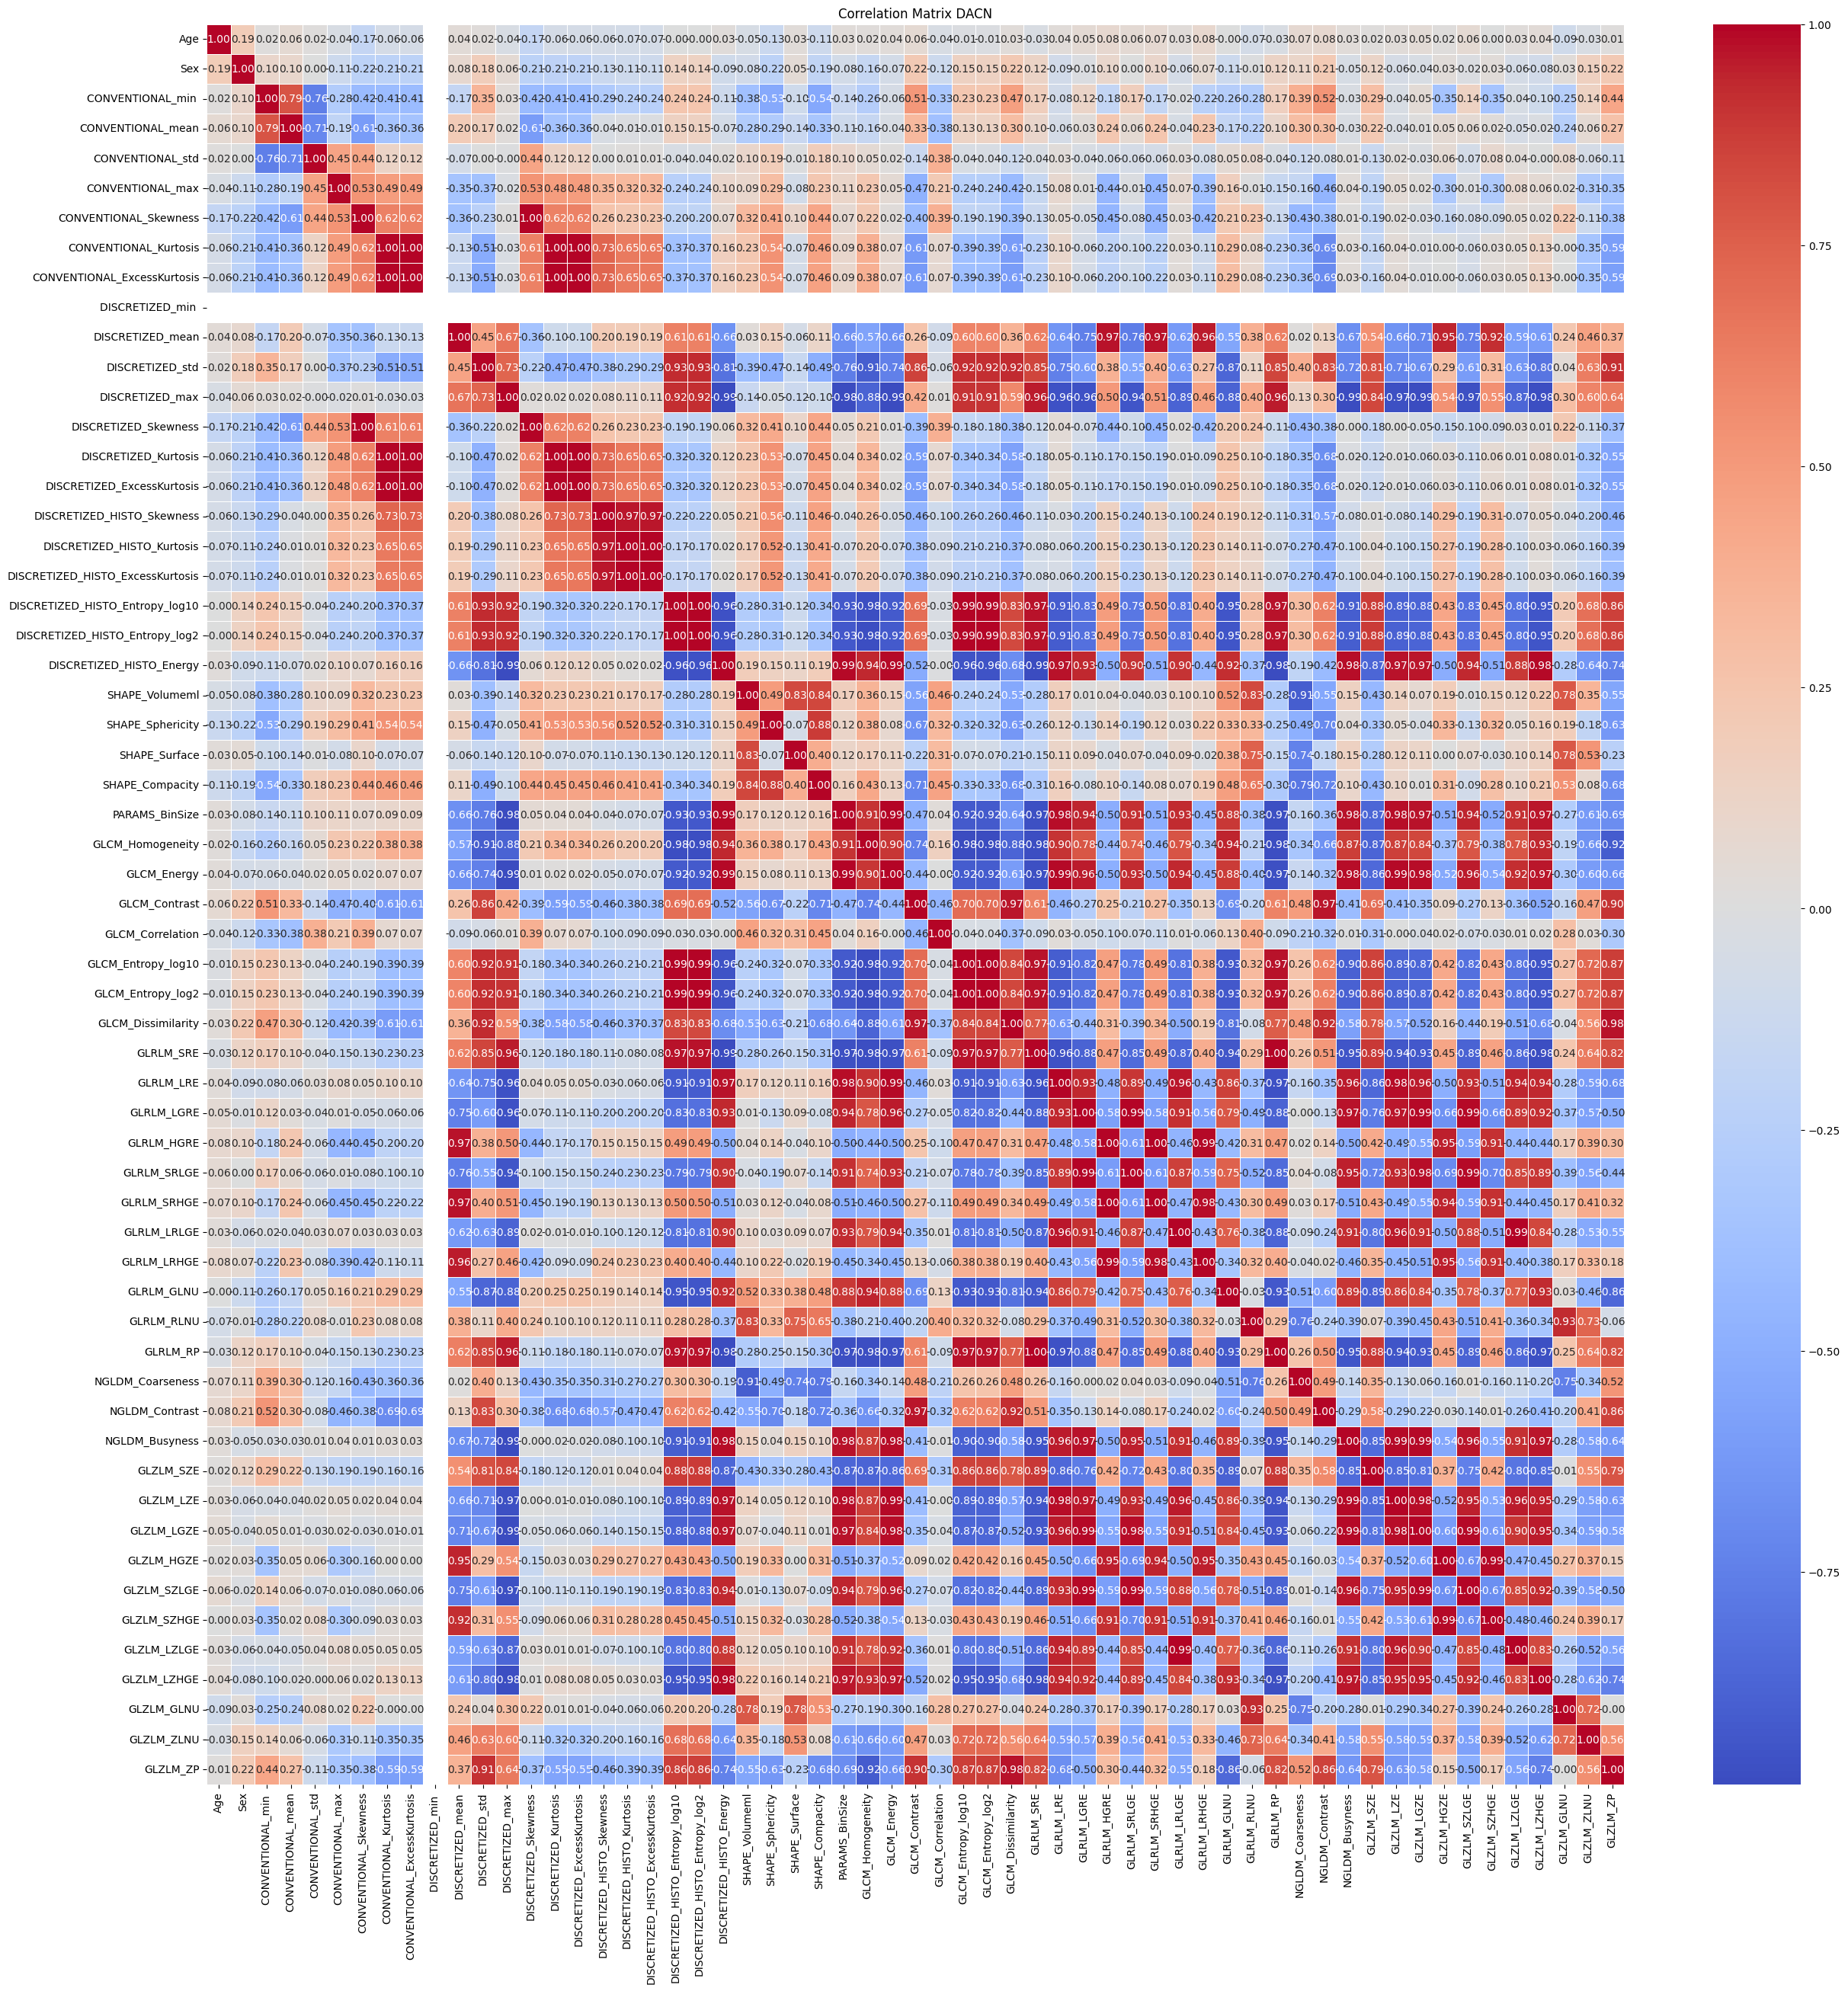

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix_dacn, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix DACN')

Text(0.5, 1.0, 'Correlation Matrix CNMCI')

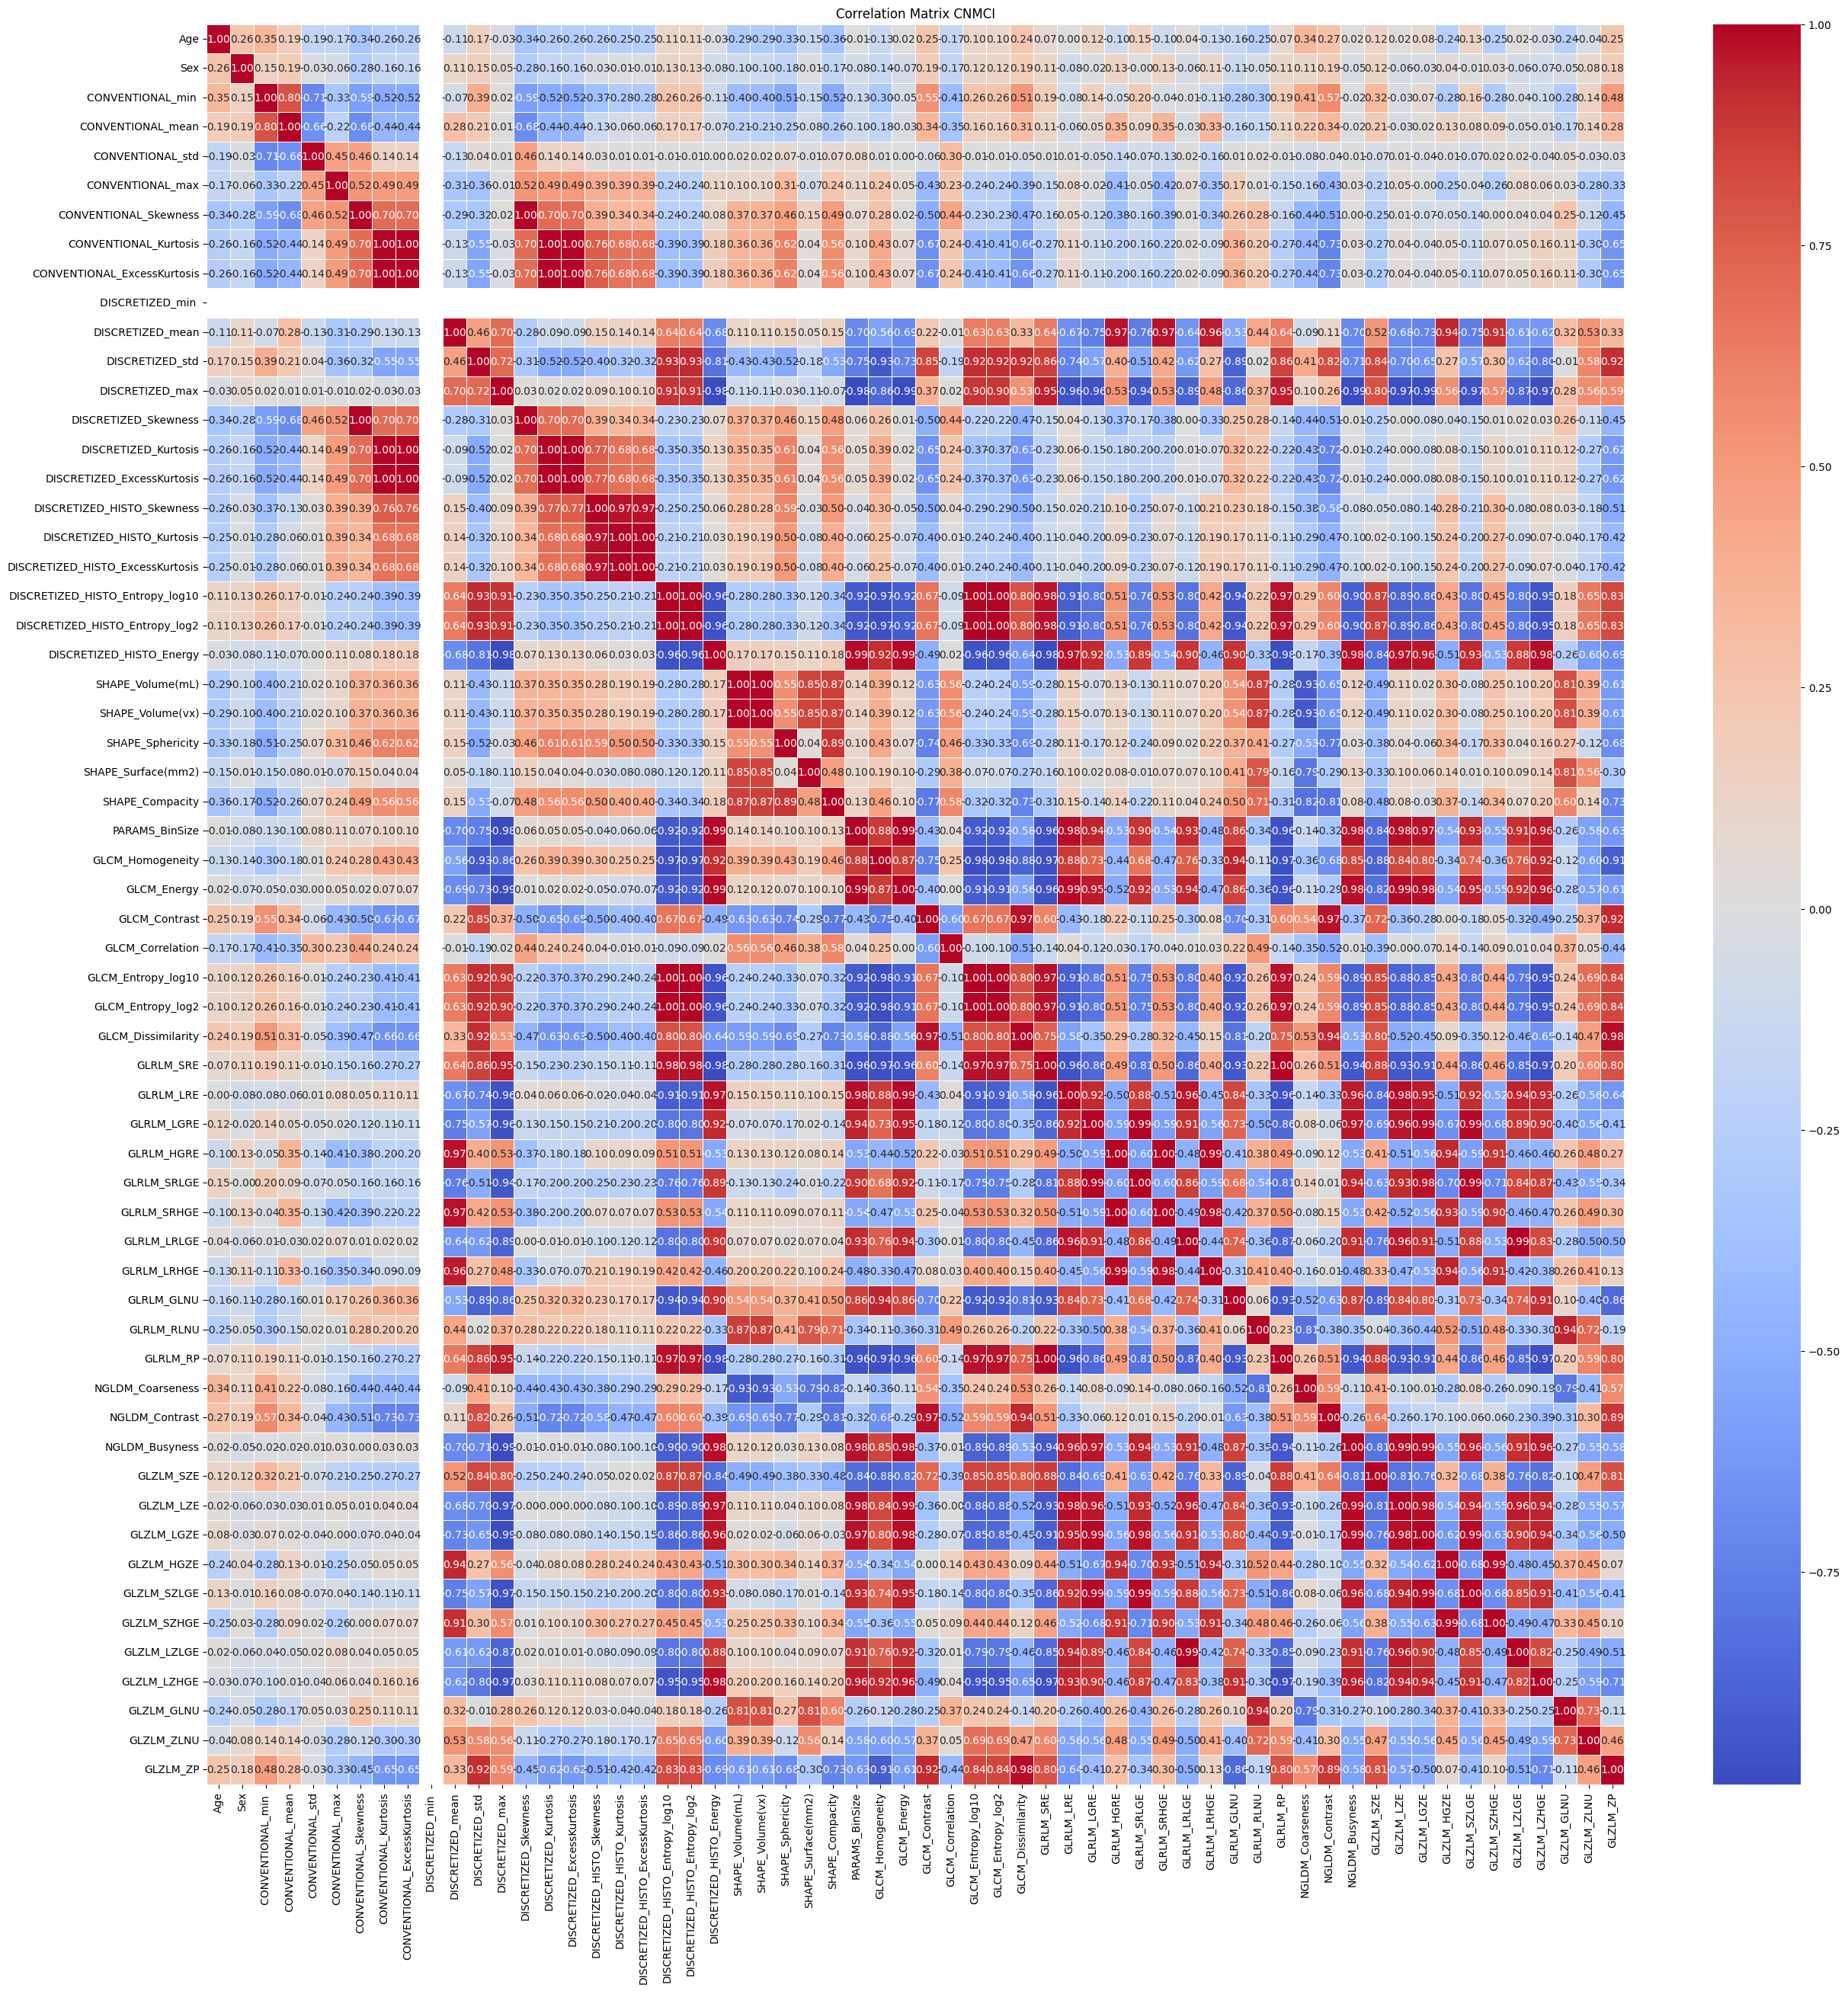

In [17]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix_cnmci, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix CNMCI')

Text(0.5, 1.0, 'Correlation Matrix DAVSMCI')

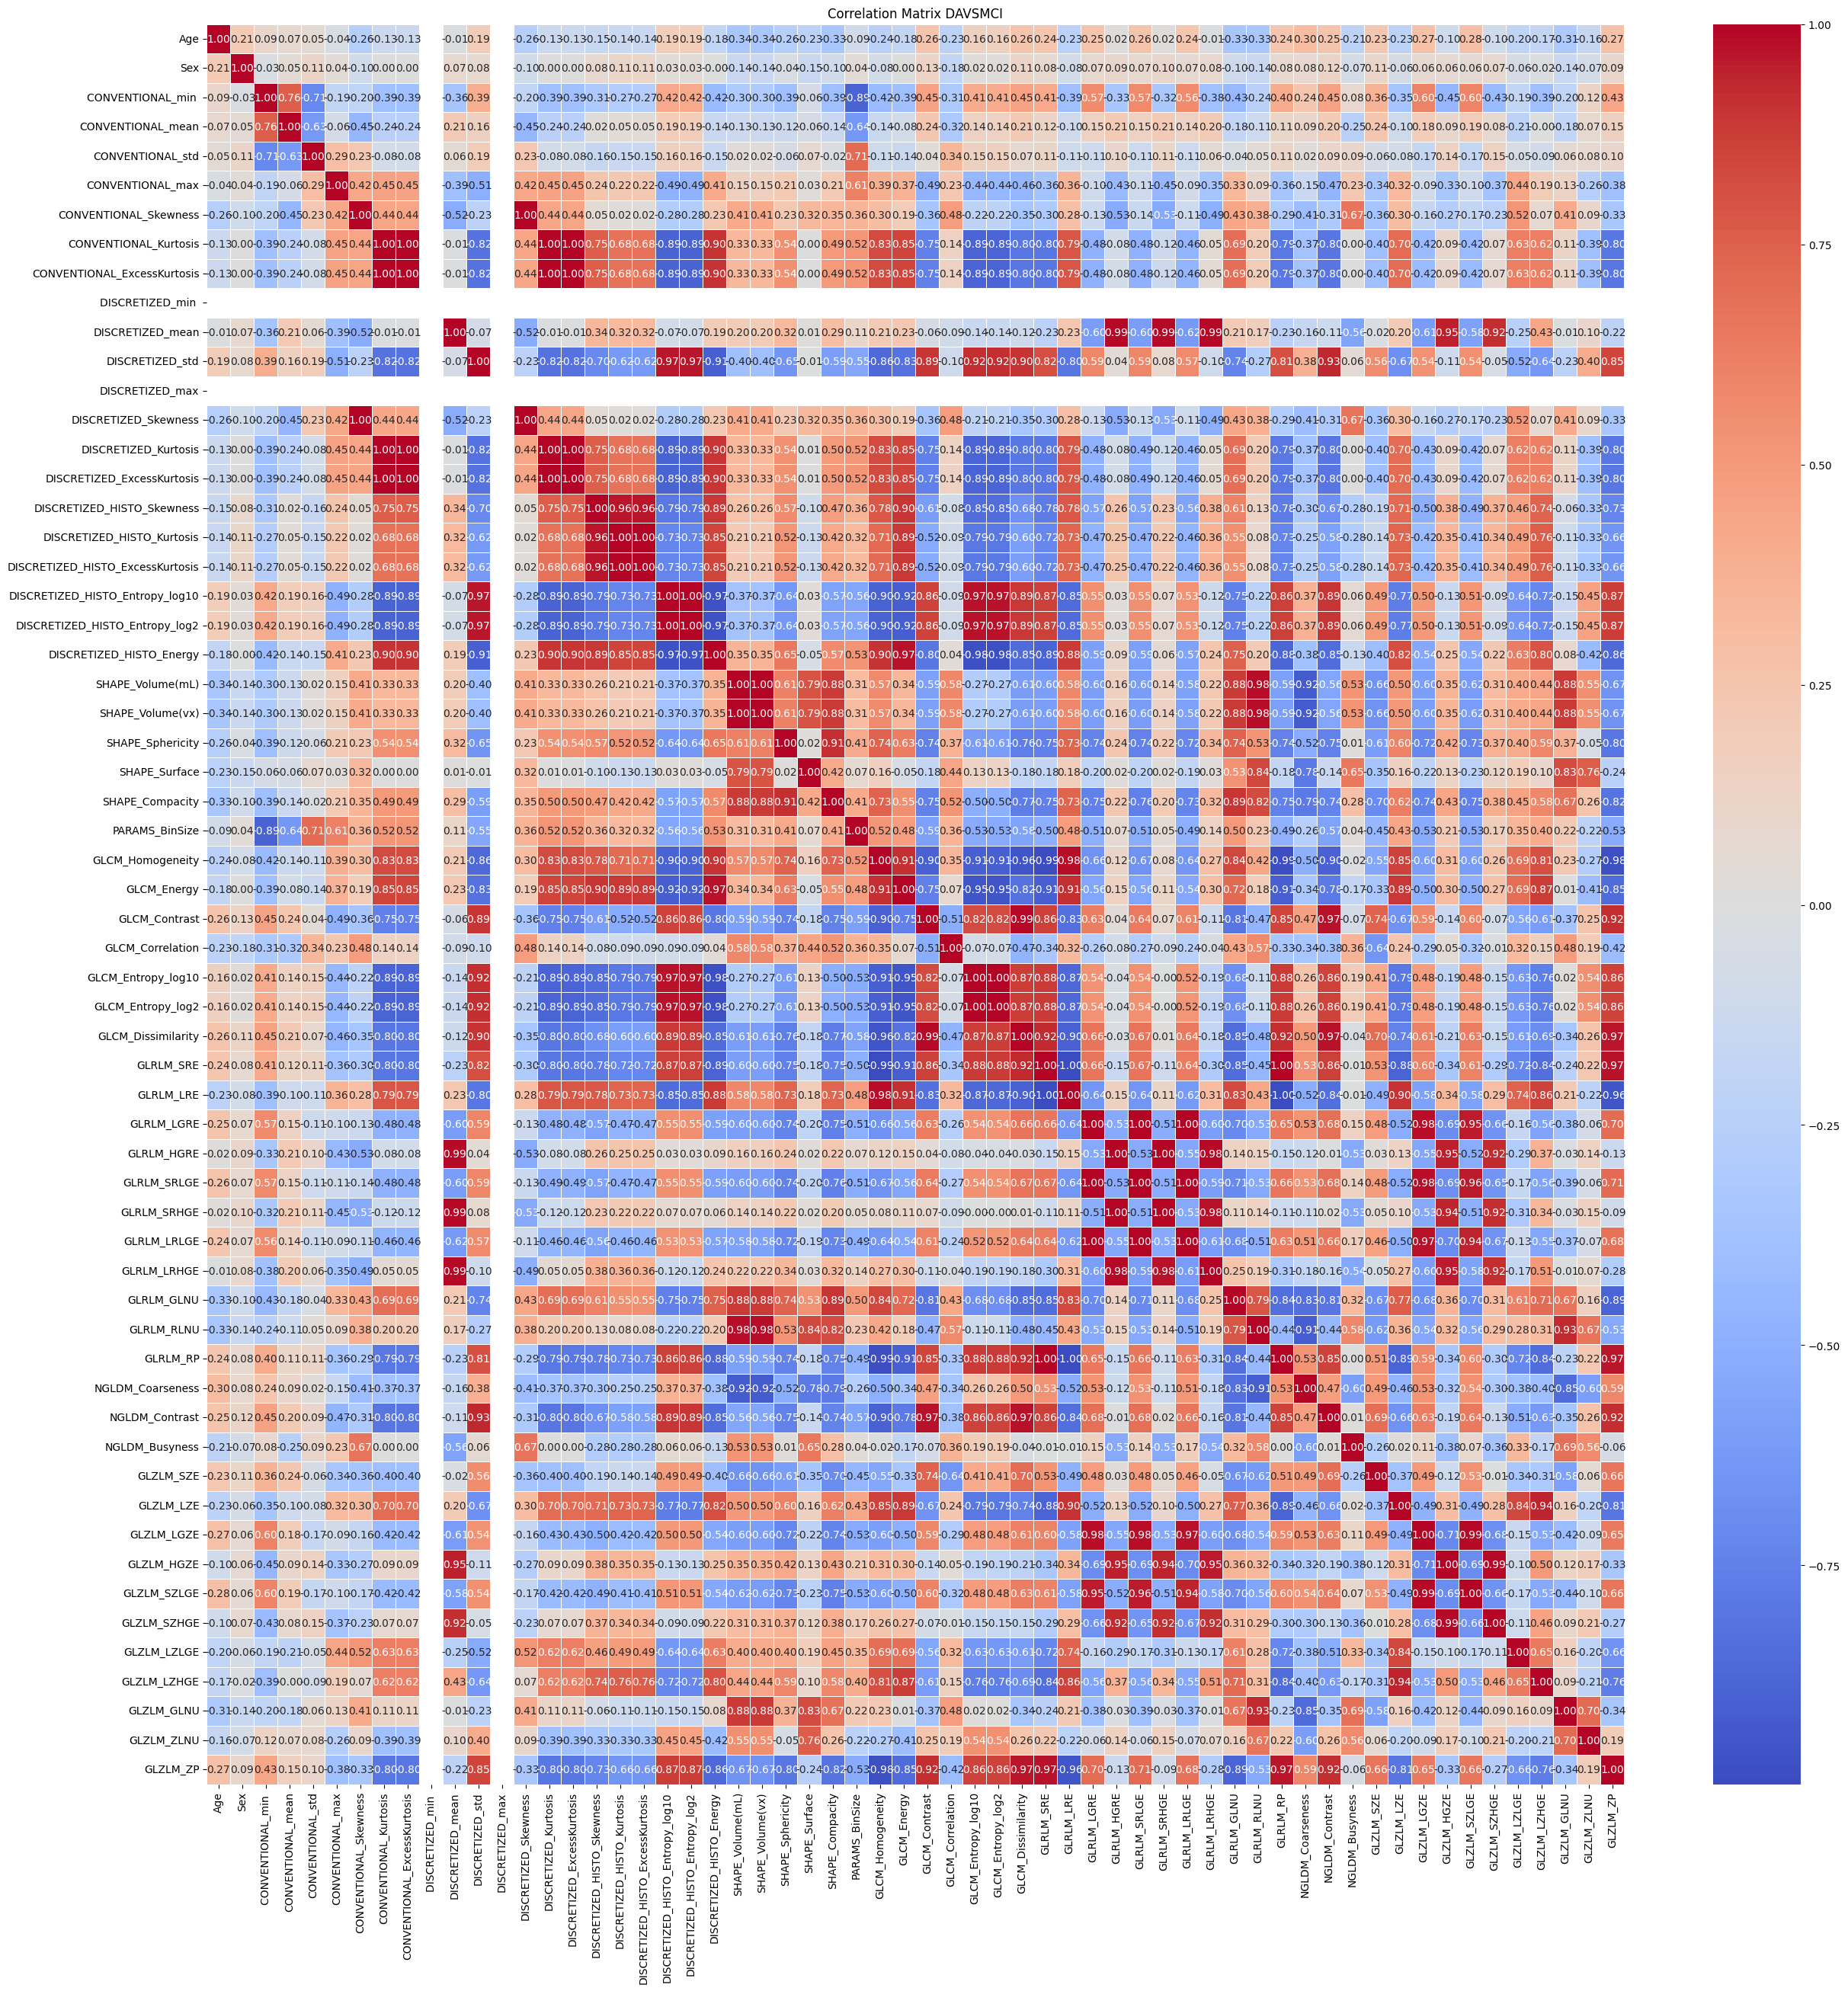

In [18]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix_damci, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix DAVSMCI')

## Models for individual datasets

In [19]:
# Train-test split
X_train_dacn, X_test_dacn, y_train_dacn, y_test_dacn = train_test_split(X_dacn, y_dacn, test_size=0.2, random_state=42)
X_train_cnmci, X_test_cnmci, y_train_cnmci, y_test_cnmci = train_test_split(X_cnmci, y_cnmci, test_size=0.2, random_state=42)
X_train_damci, X_test_damci, y_train_damci, y_test_damci = train_test_split(X_damci, y_damci, test_size=0.2, random_state=42)

##### Scaling the data

In [20]:
scaler = StandardScaler()

X_train_dacn_scaled = scaler.fit_transform(X_train_dacn)
X_test_dacn_scaled = scaler.transform(X_test_dacn)

X_train_cnmci_scaled = scaler.fit_transform(X_train_cnmci)
X_test_cnmci_scaled = scaler.transform(X_test_cnmci)

X_train_damci_scaled = scaler.fit_transform(X_train_damci)
X_test_damci_scaled = scaler.transform(X_test_damci)

#### KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)

# DACN
knn.fit(X_train_dacn_scaled, y_train_dacn)
y_pred_dacn = knn.predict(X_test_dacn_scaled)
accuracy_dacn = accuracy_score(y_test_dacn, y_pred_dacn)
print("Accuracy (DACN):", round(accuracy_dacn,2)*100, "%")

# CNMCI
knn.fit(X_train_cnmci_scaled, y_train_cnmci)
y_pred_cnmci = knn.predict(X_test_cnmci_scaled)
accuracy_cnmci = accuracy_score(y_test_cnmci, y_pred_cnmci)
print("Accuracy (CNMCI):", round(accuracy_cnmci,2)*100, "%")

# DAMCI
knn.fit(X_train_damci_scaled, y_train_damci)
y_pred_damci = knn.predict(X_test_damci_scaled)
accuracy_damci = accuracy_score(y_test_damci, y_pred_damci)
print("Accuracy (DAVSMCI):", round(accuracy_damci,2)*100, "%")


Accuracy (DACN): 94.0 %
Accuracy (CNMCI): 80.0 %
Accuracy (DAVSMCI): 88.0 %


If we take a look at the accuracy, the results look promising. However, accuracy may not be the best metric for validating the model's performance on medical data due to the possible high number of false negatives. We should also consider the confusion matrix and other metrics such as RECALL, F1 SCORE and PRECISION.

##### Confusion matrices

[[36  0]
 [ 5 39]]
[[37  7]
 [ 9 27]]
[[42  2]
 [ 8 28]]


Text(0.5, 1.0, 'DAVSMCI')

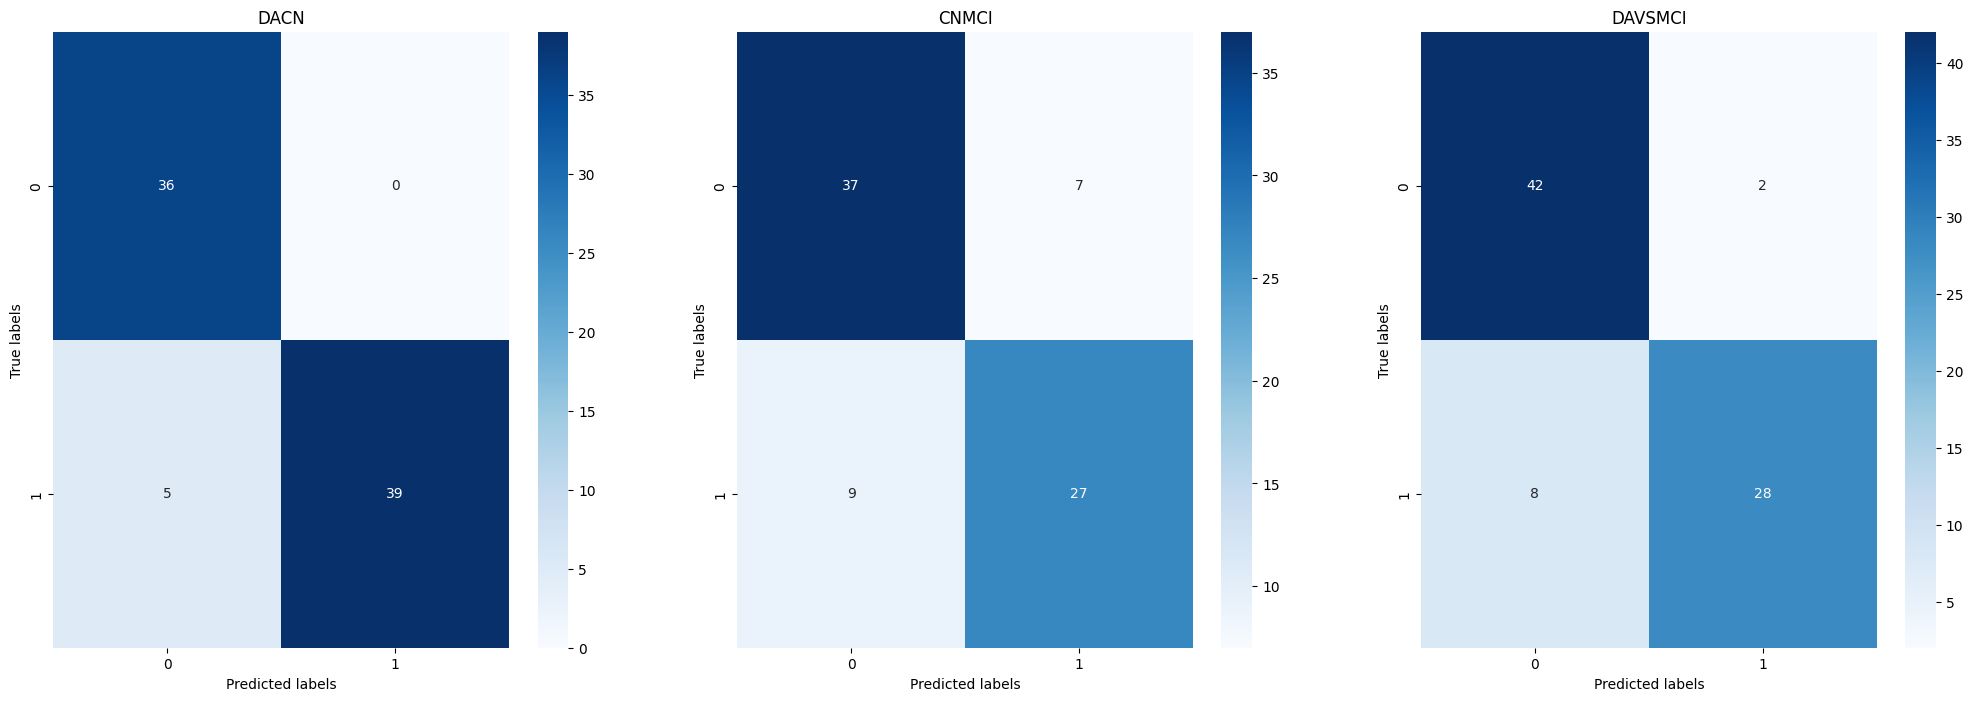

In [22]:
cm_dacn = confusion_matrix(y_test_dacn, y_pred_dacn)
cm_cnmci = confusion_matrix(y_test_cnmci, y_pred_cnmci)
cm_damci = confusion_matrix(y_test_damci, y_pred_damci)


plt.figure(figsize=(25,8))

# Plot the confusion matrices
plt.subplot(1,3,1)
print(cm_dacn)
sns.heatmap(cm_dacn, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DACN')

plt.subplot(1,3,2)
print(cm_cnmci)
sns.heatmap(cm_cnmci, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('CNMCI')

plt.subplot(1,3,3)
print(cm_damci)
sns.heatmap(cm_damci, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DAVSMCI')

Confusion matrices suggest that the KNN model has a high ability to distinguish between positive and negative instances, which is crucial for its effectiveness.

##### Other metrics

In [23]:
def metric_calculate(TP, FP, FN, TN):
    accuracy = (TP + TN)/(TP + TN + FP + FN)
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    f1_score = (2*precision*recall)/(precision+recall)

    print('Accuracy: ', round(accuracy*100,2), '%')
    print('Precision: ', round(precision*100,2), '%')
    print('Recall: ', round(recall*100,2), '%')
    print('F1 Score: ', round(f1_score*100,2), '%')

    return

In [24]:
TP = cm_dacn[1][1]
FP = cm_dacn[0][1]
FN = cm_dacn[1][0]
TN = cm_dacn[0][0]
print("DACN")
metric_calculate(TP, FP, FN, TN)

TP = cm_cnmci[1][1]
FP = cm_cnmci[0][1]
FN = cm_cnmci[1][0]
TN = cm_cnmci[0][0]
print("\nCNMCI")
metric_calculate(TP, FP, FN, TN)

TP = cm_damci[1][1]
FP = cm_damci[0][1]
FN = cm_damci[1][0]
TN = cm_damci[0][0]
print("\nDAVSMCI")
metric_calculate(TP, FP, FN, TN)

DACN
Accuracy:  93.75 %
Precision:  100.0 %
Recall:  88.64 %
F1 Score:  93.98 %

CNMCI
Accuracy:  80.0 %
Precision:  79.41 %
Recall:  75.0 %
F1 Score:  77.14 %

DAVSMCI
Accuracy:  87.5 %
Precision:  93.33 %
Recall:  77.78 %
F1 Score:  84.85 %


These results show that the KNN model has varying effectiveness in data classification, with the best performance on the DACN dataset, somewhat lower performance on the CNMCI dataset, and performance on the DAVSMCI dataset is somewhere in between.

#### SVM

##### Linear kernel

In [25]:
svm_linear = SVC(kernel='linear')

svm_linear.fit(X_train_dacn_scaled, y_train_dacn)
y_pred_dacn = svm_linear.predict(X_test_dacn_scaled)
svm_accuracy_linear = accuracy_score(y_test_dacn, y_pred_dacn)
print("DACN SVM Accuracy for linear kernel:", round(svm_accuracy_linear,2)*100, "%")

svm_linear.fit(X_train_cnmci_scaled, y_train_cnmci)
y_pred_cnmci = svm_linear.predict(X_test_cnmci_scaled)
svm_accuracy_linear = accuracy_score(y_test_cnmci, y_pred_cnmci)
print("CNMCI SVM Accuracy for linear kernel:", round(svm_accuracy_linear,2)*100, "%")

svm_linear.fit(X_train_damci_scaled, y_train_damci)
y_pred_damci = svm_linear.predict(X_test_damci_scaled)
svm_accuracy_linear = accuracy_score(y_test_damci, y_pred_damci)
print("DAVSMCI SVM Accuracy for linear kernel:", round(svm_accuracy_linear,2)*100, "%")

DACN SVM Accuracy for linear kernel: 96.0 %
CNMCI SVM Accuracy for linear kernel: 86.0 %
DAVSMCI SVM Accuracy for linear kernel: 71.0 %


These results indicate strong performance of the model, but we still need to take a look at the confusion matrices and other metrics.

[[36  0]
 [ 3 41]]
[[39  5]
 [ 6 30]]
[[35  9]
 [14 22]]


Text(0.5, 1.0, 'DAVSMCI')

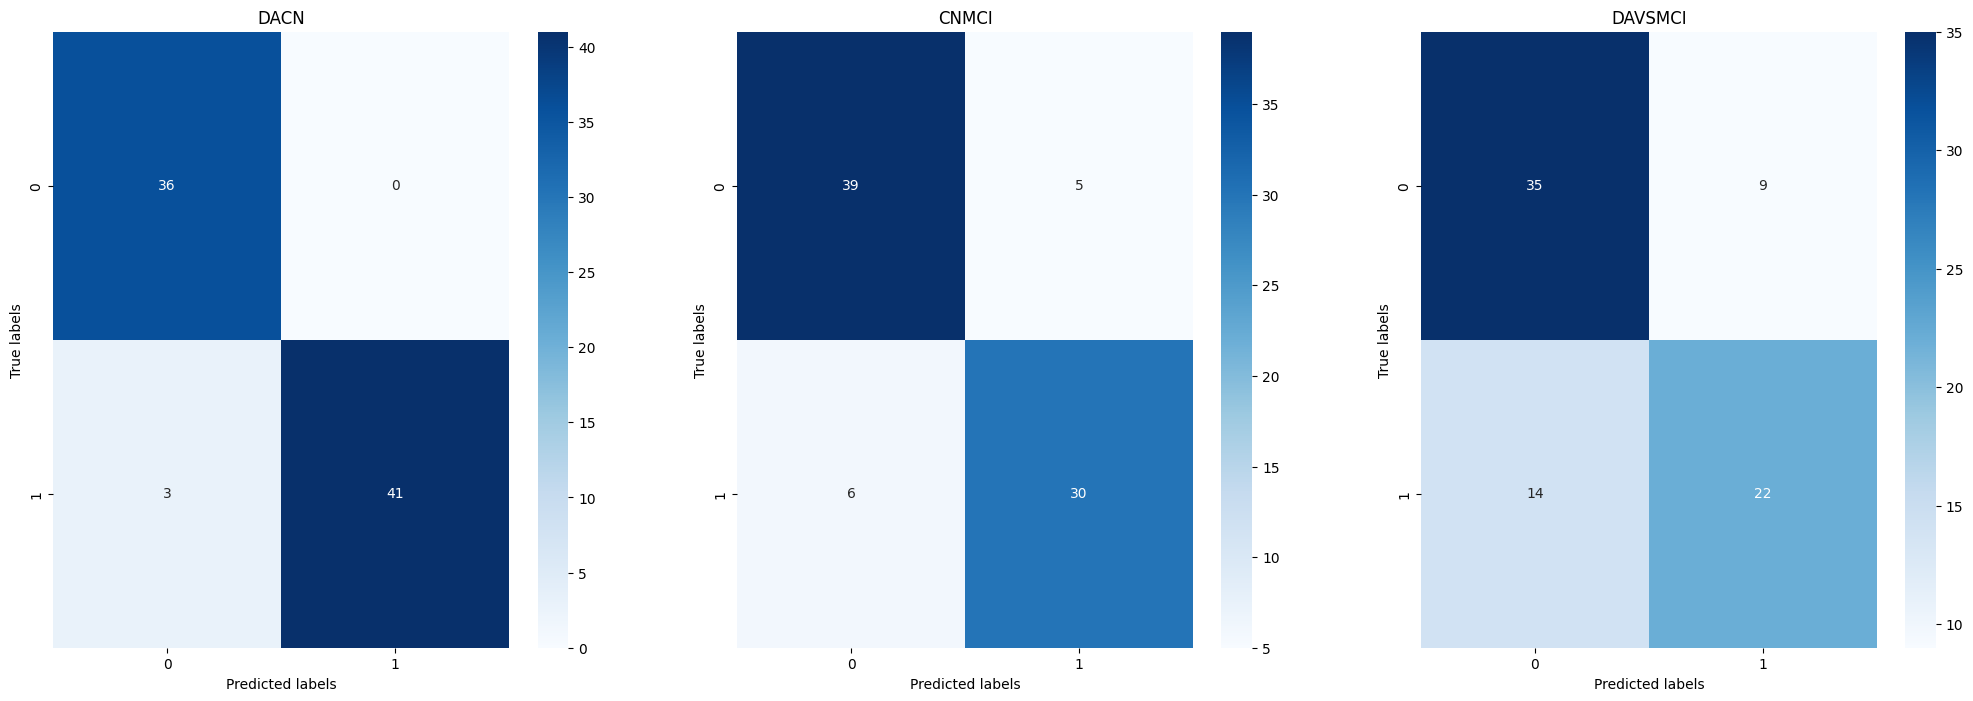

In [26]:
cm_dacn = confusion_matrix(y_test_dacn, y_pred_dacn)
cm_cnmci = confusion_matrix(y_test_cnmci, y_pred_cnmci)
cm_damci = confusion_matrix(y_test_damci, y_pred_damci)

plt.figure(figsize=(25,8))

# Plot the confusion matrices
plt.subplot(1,3,1)
print(cm_dacn)
sns.heatmap(cm_dacn, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DACN')

plt.subplot(1,3,2)
print(cm_cnmci)
sns.heatmap(cm_cnmci, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('CNMCI')

plt.subplot(1,3,3)
print(cm_damci)
sns.heatmap(cm_damci, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DAVSMCI')

In [27]:
TP = cm_dacn[1][1]
FP = cm_dacn[0][1]
FN = cm_dacn[1][0]
TN = cm_dacn[0][0]
print("DACN")
metric_calculate(TP, FP, FN, TN)

TP = cm_cnmci[1][1]
FP = cm_cnmci[0][1]
FN = cm_cnmci[1][0]
TN = cm_cnmci[0][0]
print("\nCNMCI")
metric_calculate(TP, FP, FN, TN)

TP = cm_damci[1][1]
FP = cm_damci[0][1]
FN = cm_damci[1][0]
TN = cm_damci[0][0]
print("\nDAVSMCI")
metric_calculate(TP, FP, FN, TN)

DACN
Accuracy:  96.25 %
Precision:  100.0 %
Recall:  93.18 %
F1 Score:  96.47 %

CNMCI
Accuracy:  86.25 %
Precision:  85.71 %
Recall:  83.33 %
F1 Score:  84.51 %

DAVSMCI
Accuracy:  71.25 %
Precision:  70.97 %
Recall:  61.11 %
F1 Score:  65.67 %


Analyzing the confusion matrices and other metrics, we see that for DACN, the model had a low false positive rate, which means that it achieved high precision and recall. Performance of the model on CNMCI dataset was slightly lower but also good, while on the DAVSMCI dataset, model struggled more in correctly identifying positive instances while minimizing false positives.
The SVM model with a linear kernel showed promising performance for DACN and CNMCI datasets, and it faced some challenges in effectiveness on the DAVSMCI dataset.

##### RBF kernel

In [28]:
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X_train_dacn_scaled, y_train_dacn)
y_pred_dacn = svm_rbf.predict(X_test_dacn_scaled)
svm_accuracy_rbf = accuracy_score(y_test_dacn, y_pred_dacn)
print("DACN SVM Accuracy for RBF kernel:", round(svm_accuracy_rbf,2)*100, "%")

svm_rbf.fit(X_train_cnmci_scaled, y_train_cnmci)
y_pred_cnmci = svm_rbf.predict(X_test_cnmci_scaled)
svm_accuracy_rbf = accuracy_score(y_test_cnmci, y_pred_cnmci)
print("CNMCI SVM Accuracy for RBF kernel:", round(svm_accuracy_rbf,2)*100, "%")

svm_rbf.fit(X_train_damci_scaled, y_train_damci)
y_pred_damci = svm_rbf.predict(X_test_damci_scaled)
svm_accuracy_rbf = accuracy_score(y_test_damci, y_pred_damci)
print("DAVSMCI SVM Accuracy for RBF kernel:", round(svm_accuracy_rbf,2)*100, "%")

DACN SVM Accuracy for RBF kernel: 96.0 %
CNMCI SVM Accuracy for RBF kernel: 84.0 %
DAVSMCI SVM Accuracy for RBF kernel: 78.0 %


According to this results, SVM model with RBF kernel has stronger performance than SVM model with linear kernel. Let's take a look at the confusion matrices and other metrics.

[[36  0]
 [ 3 41]]
[[39  5]
 [ 8 28]]
[[38  6]
 [12 24]]


Text(0.5, 1.0, 'DAVSMCI')

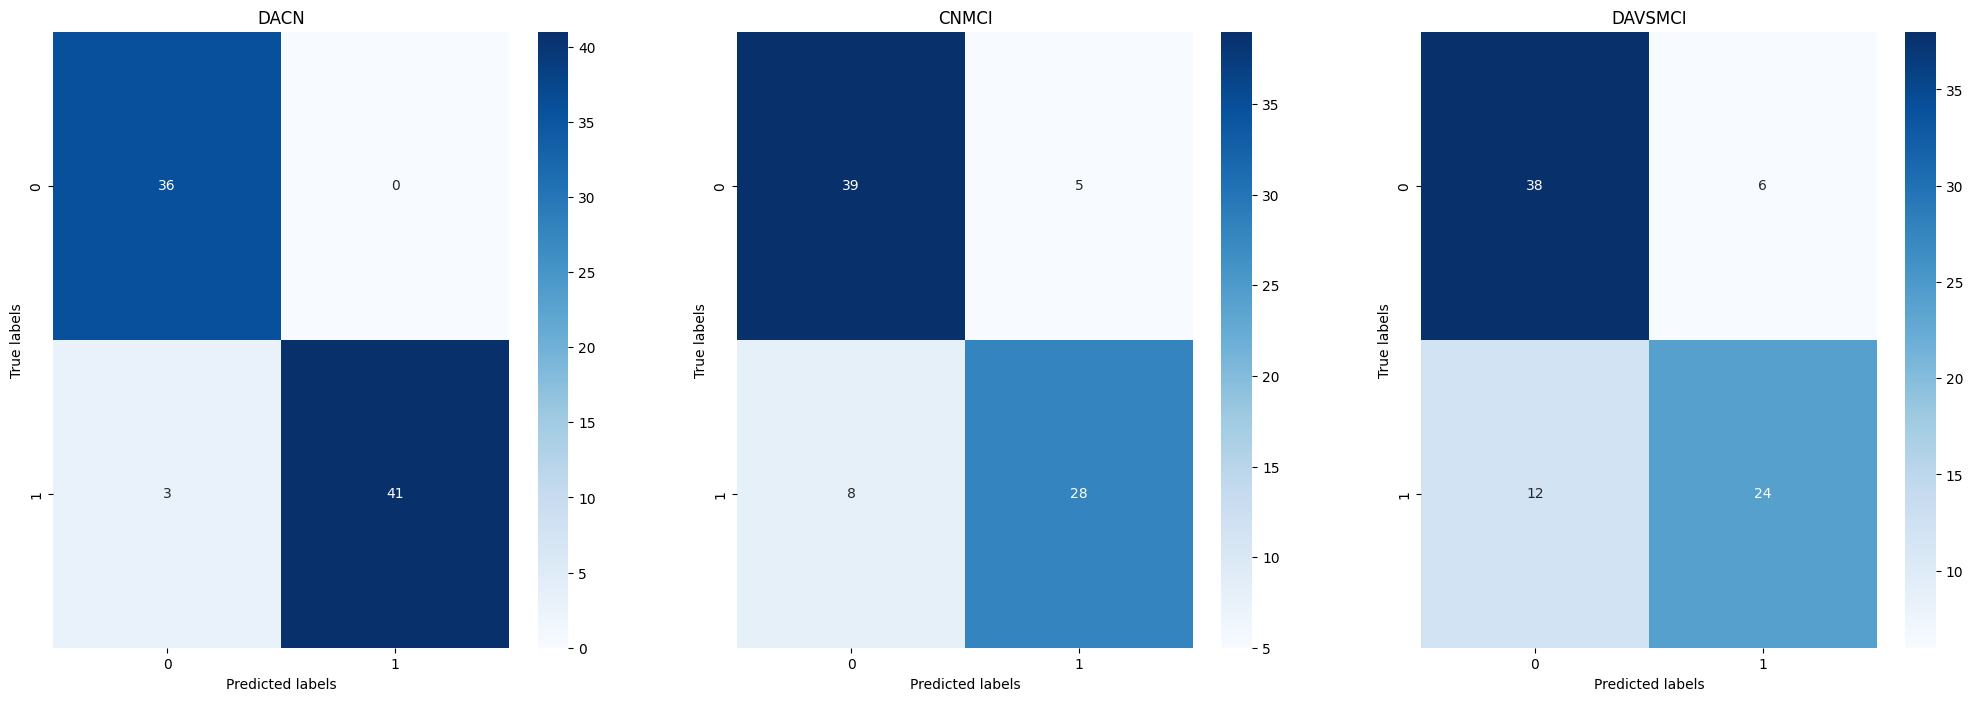

In [29]:
cm_dacn = confusion_matrix(y_test_dacn, y_pred_dacn)
cm_cnmci = confusion_matrix(y_test_cnmci, y_pred_cnmci)
cm_damci = confusion_matrix(y_test_damci, y_pred_damci)

plt.figure(figsize=(25,8))

# Plot the confusion matrices
plt.subplot(1,3,1)
print(cm_dacn)
sns.heatmap(cm_dacn, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DACN')

plt.subplot(1,3,2)
print(cm_cnmci)
sns.heatmap(cm_cnmci, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('CNMCI')

plt.subplot(1,3,3)
print(cm_damci)
sns.heatmap(cm_damci, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DAVSMCI')

In [30]:
TP = cm_dacn[1][1]
FP = cm_dacn[0][1]
FN = cm_dacn[1][0]
TN = cm_dacn[0][0]
print("DACN")
metric_calculate(TP, FP, FN, TN)

TP = cm_cnmci[1][1]
FP = cm_cnmci[0][1]
FN = cm_cnmci[1][0]
TN = cm_cnmci[0][0]
print("\nCNMCI")
metric_calculate(TP, FP, FN, TN)

TP = cm_damci[1][1]
FP = cm_damci[0][1]
FN = cm_damci[1][0]
TN = cm_damci[0][0]
print("\nDAVSMCI")
metric_calculate(TP, FP, FN, TN)

DACN
Accuracy:  96.25 %
Precision:  100.0 %
Recall:  93.18 %
F1 Score:  96.47 %

CNMCI
Accuracy:  83.75 %
Precision:  84.85 %
Recall:  77.78 %
F1 Score:  81.16 %

DAVSMCI
Accuracy:  77.5 %
Precision:  80.0 %
Recall:  66.67 %
F1 Score:  72.73 %


SVM models with RBF kernel achieved the highest accuracy on the DACN dataset, followed by CNMCI and then DAVSMCI. SVM model with the linear kernel seems to have higher performance score overall comparing to the model with RBF kernel.

##### Polynomial kernel

In [31]:
svm_poly = SVC(kernel='poly')

svm_poly.fit(X_train_dacn_scaled, y_train_dacn)
y_pred_dacn = svm_poly.predict(X_test_dacn_scaled)
svm_accuracy_poly = accuracy_score(y_test_dacn, y_pred_dacn)
print("DACN SVM Accuracy for polynomial kernel:", round(svm_accuracy_poly,2)*100, "%")

svm_poly.fit(X_train_cnmci_scaled, y_train_cnmci)
y_pred_cnmci = svm_poly.predict(X_test_cnmci_scaled)
svm_accuracy_poly = accuracy_score(y_test_cnmci, y_pred_cnmci)
print("CNMCI SVM Accuracy for polynomial kernel:", round(svm_accuracy_poly,2)*100, "%")

svm_poly.fit(X_train_damci_scaled, y_train_damci)
y_pred_damci = svm_poly.predict(X_test_damci_scaled)
svm_accuracy_poly = accuracy_score(y_test_damci, y_pred_damci)
print("DAVSMCI SVM Accuracy for polynomial kernel:", round(svm_accuracy_poly,2)*100, "%")

DACN SVM Accuracy for polynomial kernel: 86.0 %
CNMCI SVM Accuracy for polynomial kernel: 71.0 %
DAVSMCI SVM Accuracy for polynomial kernel: 68.0 %


SVM model with polynomial kernel appears to have weaker performance compared to SVM models with linear and RBF kernels. However, let's delve deeper into other metrics.

[[36  0]
 [11 33]]
[[44  0]
 [23 13]]
[[39  5]
 [21 15]]


Text(0.5, 1.0, 'DAVSMCI')

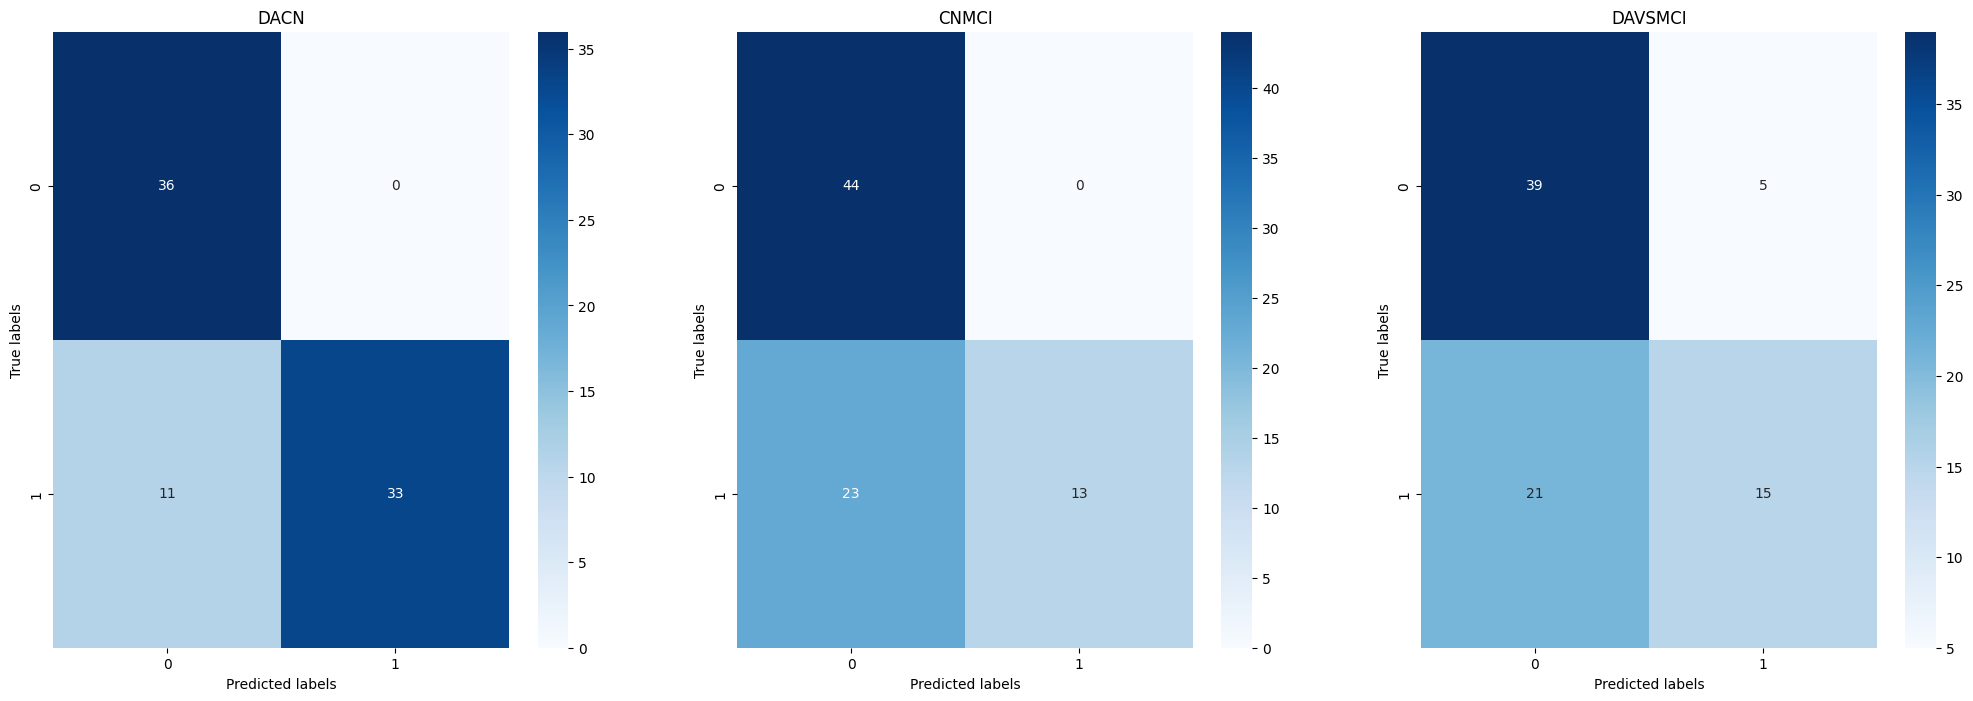

In [32]:
cm_dacn = confusion_matrix(y_test_dacn, y_pred_dacn)
cm_cnmci = confusion_matrix(y_test_cnmci, y_pred_cnmci)
cm_damci = confusion_matrix(y_test_damci, y_pred_damci)

plt.figure(figsize=(25,8))

# Plot the confusion matrices
plt.subplot(1,3,1)
print(cm_dacn)
sns.heatmap(cm_dacn, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DACN')

plt.subplot(1,3,2)
print(cm_cnmci)
sns.heatmap(cm_cnmci, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('CNMCI')

plt.subplot(1,3,3)
print(cm_damci)
sns.heatmap(cm_damci, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DAVSMCI')

In [33]:
TP = cm_dacn[1][1]
FP = cm_dacn[0][1]
FN = cm_dacn[1][0]
TN = cm_dacn[0][0]
print("DACN")
metric_calculate(TP, FP, FN, TN)

TP = cm_cnmci[1][1]
FP = cm_cnmci[0][1]
FN = cm_cnmci[1][0]
TN = cm_cnmci[0][0]
print("\nCNMCI")
metric_calculate(TP, FP, FN, TN)

TP = cm_damci[1][1]
FP = cm_damci[0][1]
FN = cm_damci[1][0]
TN = cm_damci[0][0]
print("\nDAVSMCI")
metric_calculate(TP, FP, FN, TN)

DACN
Accuracy:  86.25 %
Precision:  100.0 %
Recall:  75.0 %
F1 Score:  85.71 %

CNMCI
Accuracy:  71.25 %
Precision:  100.0 %
Recall:  36.11 %
F1 Score:  53.06 %

DAVSMCI
Accuracy:  67.5 %
Precision:  75.0 %
Recall:  41.67 %
F1 Score:  53.57 %


The accuracy achieved with the SVM model using the polynomial kernel is decent. However, the model is bad at predicting disease as seen by the extremely high false negative number. The model performs worse compared to SVM with linear and RBF kernels. DACN dataset achieves the highest accuracy, followed by CNMCI and then DAVSMCI.

#### Random Forest Classifier

In [34]:
clf = RandomForestClassifier()

clf.fit(X_train_dacn_scaled, y_train_dacn)
y_pred_dacn = clf.predict(X_test_dacn_scaled)
accuracy = accuracy_score(y_test_dacn, y_pred_dacn)
print("DACN Accuracy of a Random Forest Classifier:", round(accuracy,2)*100, "%")

clf.fit(X_train_cnmci_scaled, y_train_cnmci)
y_pred_cnmci = clf.predict(X_test_cnmci_scaled)
accuracy = accuracy_score(y_test_cnmci, y_pred_cnmci)
print("CNMCI Accuracy of a Random Forest Classifier:", round(accuracy,2)*100, "%")

clf.fit(X_train_damci_scaled, y_train_damci)
y_pred_damci = clf.predict(X_test_damci_scaled)
accuracy = accuracy_score(y_test_damci, y_pred_damci)
print("DAVSMCI Accuracy of a Random Forest Classifier:", round(accuracy,2)*100, "%")

DACN Accuracy of a Random Forest Classifier: 91.0 %
CNMCI Accuracy of a Random Forest Classifier: 84.0 %
DAVSMCI Accuracy of a Random Forest Classifier: 79.0 %


[[34  2]
 [ 5 39]]
[[38  6]
 [ 7 29]]
[[38  6]
 [11 25]]


Text(0.5, 1.0, 'DAVSMCI')

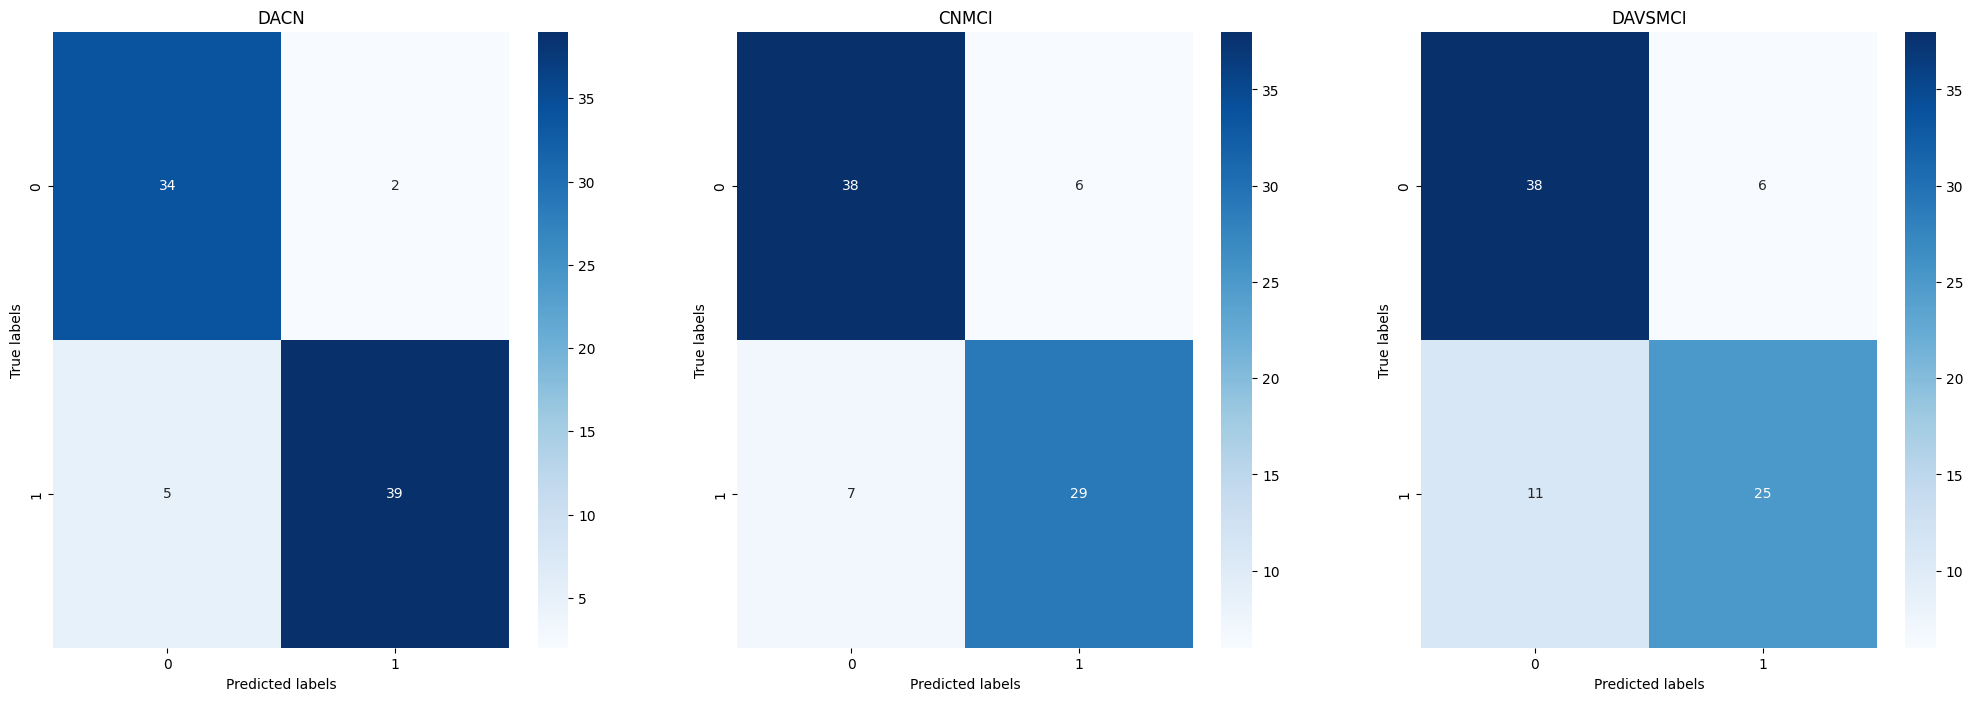

In [35]:
cm_dacn = confusion_matrix(y_test_dacn, y_pred_dacn)
cm_cnmci = confusion_matrix(y_test_cnmci, y_pred_cnmci)
cm_damci = confusion_matrix(y_test_damci, y_pred_damci)

plt.figure(figsize=(25,8))

# Plot the confusion matrices
plt.subplot(1,3,1)
print(cm_dacn)
sns.heatmap(cm_dacn, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DACN')

plt.subplot(1,3,2)
print(cm_cnmci)
sns.heatmap(cm_cnmci, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('CNMCI')

plt.subplot(1,3,3)
print(cm_damci)
sns.heatmap(cm_damci, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DAVSMCI')

In [36]:
TP = cm_dacn[1][1]
FP = cm_dacn[0][1]
FN = cm_dacn[1][0]
TN = cm_dacn[0][0]
print("DACN")
metric_calculate(TP, FP, FN, TN)

TP = cm_cnmci[1][1]
FP = cm_cnmci[0][1]
FN = cm_cnmci[1][0]
TN = cm_cnmci[0][0]
print("\nCNMCI")
metric_calculate(TP, FP, FN, TN)

TP = cm_damci[1][1]
FP = cm_damci[0][1]
FN = cm_damci[1][0]
TN = cm_damci[0][0]
print("\nDAVSMCI")
metric_calculate(TP, FP, FN, TN)

DACN
Accuracy:  91.25 %
Precision:  95.12 %
Recall:  88.64 %
F1 Score:  91.76 %

CNMCI
Accuracy:  83.75 %
Precision:  82.86 %
Recall:  80.56 %
F1 Score:  81.69 %

DAVSMCI
Accuracy:  78.75 %
Precision:  80.65 %
Recall:  69.44 %
F1 Score:  74.63 %


For the Random Forest Classifier, we obtained high accuracy for DACN, CNMCI and DAVSMCI datasets. It distinguished between positive and negative instances, as evidenced by high precision and recall scores. When comparing the results with those of KNN and SVM models, we can say that Random Forest Classifier achieved high accuracy, precision and recall values, but its computational complexity might be higher.

#### Neural Network

DACN

In [37]:
# Defining the MLP architecture
model1 = Sequential([
    Dense(15, activation='relu', input_shape=(X_train_dacn_scaled.shape[1],)),  # 15 neurons with ReLU activation
    Dense(15, activation='relu'),   # 15 neurons with ReLU activation
    Dense(1, activation='sigmoid') # Output layer with sigmoid activation function
])

# Compiling the model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
#Train the model
history = model1.fit(X_train_dacn_scaled, y_train_dacn, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
9/9 [==============================] - 1s 50ms/step - loss: 0.6371 - accuracy: 0.6319 - val_loss: 0.5952 - val_accuracy: 0.5938
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 0.5611 - accuracy: 0.6979 - val_loss: 0.5387 - val_accuracy: 0.6875
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 0.5014 - accuracy: 0.7743 - val_loss: 0.5019 - val_accuracy: 0.7188
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 0.4549 - accuracy: 0.7917 - val_loss: 0.4690 - val_accuracy: 0.7500
Epoch 5/10
9/9 [==============================] - 0s 10ms/step - loss: 0.4171 - accuracy: 0.8264 - val_loss: 0.4376 - val_accuracy: 0.7500
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 0.3846 - accuracy: 0.8646 - val_loss: 0.4101 - val_accuracy: 0.8125
Epoch 7/10
9/9 [==============================] - 0s 11ms/step - loss: 0.3574 - accuracy: 0.8819 - val_loss: 0.3830 - val_accuracy: 0.8125
Epoch 8/10
9/9 [============

3/3 [==============================] - 0s 6ms/step - loss: 0.3198 - accuracy: 0.8500
Test Accuracy for DACN: 85.0 %


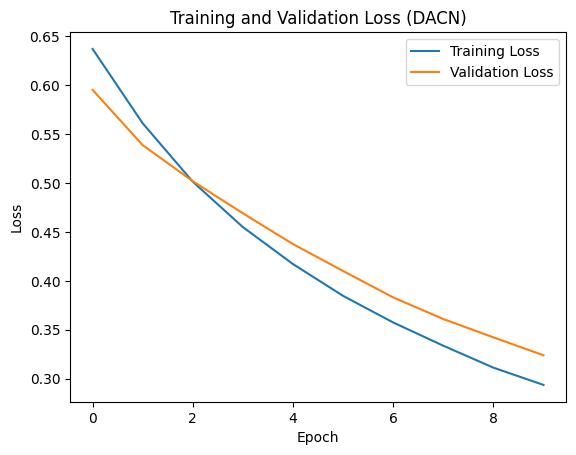

In [39]:
# Evaluating on test data and plotting loss over epochs
loss, accuracy = model1.evaluate(X_test_dacn_scaled, y_test_dacn)
print("Test Accuracy for DACN:", round(accuracy,2)*100, "%")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (DACN)')
plt.legend()
plt.show()

In [40]:
# Prediction on test dataset
y_prob_dacn = model1.predict(X_test_dacn_scaled)
y_pred_dacn = [1 if prob > 0.5 else 0 for prob in y_prob_dacn]

# Confusion matrix
cm_dacn = confusion_matrix(y_test_dacn, y_pred_dacn)

3/3 [==============================] - 0s 4ms/step


CNMCI

In [41]:
y_train_cnmci_new = [1 if num == 2 else 0 for num in y_train_cnmci]
y_train_cnmci_new = np.array(y_train_cnmci_new)
print(y_train_cnmci_new)

y_test_cnmci_new = [1 if num == 2 else 0 for num in y_test_cnmci]
y_test_cnmci_new = np.array(y_test_cnmci_new)
print(y_test_cnmci_new)

[0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0
 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0
 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0]
[1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 1 1 1 0 1]


In [42]:
# Defining the MLP architecture
model2 = Sequential([
    Dense(15, activation='relu', input_shape=(X_train_cnmci_scaled.shape[1],)),  # 15 neurons with ReLU activation
    Dense(15, activation='relu'),   # 15 neurons with ReLU activation
    Dense(1, activation='sigmoid') # Output layer with sigmoid activation function
])

# Compiling the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
#Train the model
history = model2.fit(X_train_cnmci_scaled, y_train_cnmci_new, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
9/9 [==============================] - 1s 31ms/step - loss: 0.7927 - accuracy: 0.5139 - val_loss: 0.6923 - val_accuracy: 0.5625
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 0.6984 - accuracy: 0.5312 - val_loss: 0.6073 - val_accuracy: 0.5625
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 0.6318 - accuracy: 0.5660 - val_loss: 0.5472 - val_accuracy: 0.5938
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 0.5850 - accuracy: 0.6424 - val_loss: 0.5031 - val_accuracy: 0.6875
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 0.5558 - accuracy: 0.7014 - val_loss: 0.4677 - val_accuracy: 0.7188
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 0.5318 - accuracy: 0.7257 - val_loss: 0.4436 - val_accuracy: 0.7812
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 0.5131 - accuracy: 0.7465 - val_loss: 0.4239 - val_accuracy: 0.8125
Epoch 8/10
9/9 [=================

3/3 [==============================] - 0s 7ms/step - loss: 0.4895 - accuracy: 0.7875
Test Accuracy for CNMCI: 79.0 %


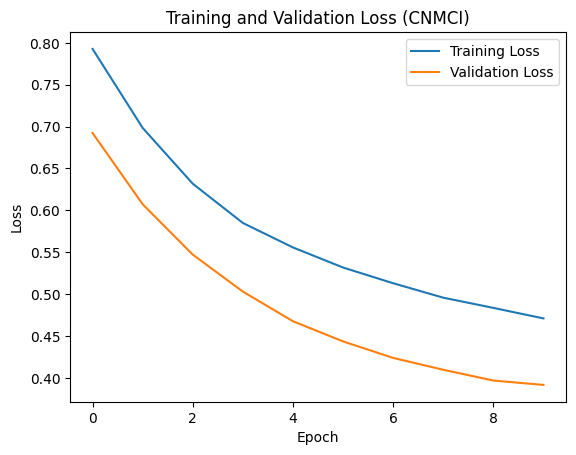

In [44]:
# Evaluating on test data and plotting loss over epochs
loss, accuracy = model2.evaluate(X_test_cnmci_scaled, y_test_cnmci_new)
print("Test Accuracy for CNMCI:", round(accuracy,2)*100, "%")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (CNMCI)')
plt.legend()
plt.show()

In [45]:
# Prediction on test dataset
y_prob_cnmci = model2.predict(X_test_cnmci_scaled)
y_pred_cnmci = [1 if prob > 0.5 else 0 for prob in y_prob_cnmci]

# Confusion matrix
cm_cnmci = confusion_matrix(y_test_cnmci_new, y_pred_cnmci)

3/3 [==============================] - 0s 4ms/step


DAVSMCI

In [46]:
y_train_damci_new = [1 if num == 2 else 0 for num in y_train_damci]
y_train_damci_new = np.array(y_train_damci_new)
print(y_train_cnmci_new)

y_test_damci_new = [1 if num == 2 else 0 for num in y_test_damci]
y_test_damci_new = np.array(y_test_damci_new)
print(y_test_damci_new)

[0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0
 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0
 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0]
[1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 1 1 1 0 1]


In [47]:
# Defining the MLP architecture
model3 = Sequential([
    Dense(15, activation='relu', input_shape=(X_train_damci_scaled.shape[1],)),  # 15 neurons with ReLU activation
    Dense(15, activation='relu'),   # 15 neurons with ReLU activation
    Dense(1, activation='sigmoid') # Output layer with sigmoid activation function
])

# Compiling the model
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
#Train the model
history = model3.fit(X_train_damci_scaled, y_train_damci_new, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
9/9 [==============================] - 1s 51ms/step - loss: 0.8859 - accuracy: 0.4861 - val_loss: 0.9277 - val_accuracy: 0.5000
Epoch 2/10
9/9 [==============================] - 0s 12ms/step - loss: 0.7908 - accuracy: 0.4861 - val_loss: 0.8365 - val_accuracy: 0.4688
Epoch 3/10
9/9 [==============================] - 0s 12ms/step - loss: 0.7342 - accuracy: 0.5104 - val_loss: 0.7877 - val_accuracy: 0.4375
Epoch 4/10
9/9 [==============================] - 0s 13ms/step - loss: 0.6989 - accuracy: 0.5347 - val_loss: 0.7631 - val_accuracy: 0.4375
Epoch 5/10
9/9 [==============================] - 0s 12ms/step - loss: 0.6716 - accuracy: 0.6007 - val_loss: 0.7473 - val_accuracy: 0.4688
Epoch 6/10
9/9 [==============================] - 0s 12ms/step - loss: 0.6527 - accuracy: 0.6771 - val_loss: 0.7341 - val_accuracy: 0.5312
Epoch 7/10
9/9 [==============================] - 0s 12ms/step - loss: 0.6364 - accuracy: 0.7083 - val_loss: 0.7231 - val_accuracy: 0.5625
Epoch 8/10
9/9 [===========

3/3 [==============================] - 0s 5ms/step - loss: 0.6128 - accuracy: 0.6875
Test Accuracy for DAVSMCI: 69.0 %


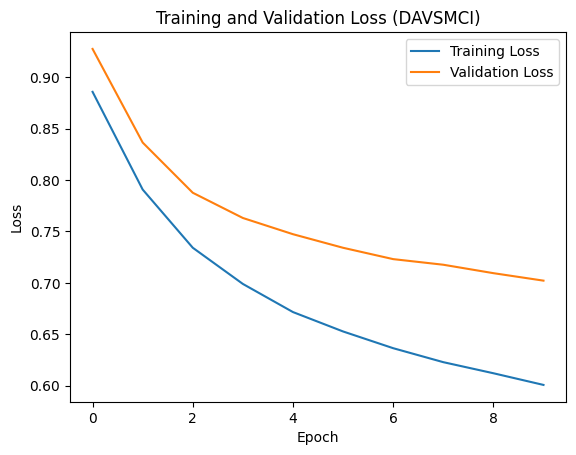

In [49]:
# Evaluating on test data and plotting loss over epochs
loss, accuracy = model3.evaluate(X_test_damci_scaled, y_test_damci_new)
print("Test Accuracy for DAVSMCI:", round(accuracy,2)*100, "%")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (DAVSMCI)')
plt.legend()
plt.show()

In [50]:
# Prediction on test dataset
y_prob_damci = model3.predict(X_test_damci_scaled)
y_pred_damci = [1 if prob > 0.5 else 0 for prob in y_prob_damci]

# Confusion matrix
cm_damci = confusion_matrix(y_test_damci_new, y_pred_damci)

3/3 [==============================] - 0s 3ms/step


[[33  3]
 [ 9 35]]
[[36  8]
 [ 9 27]]
[[30 14]
 [11 25]]


Text(0.5, 1.0, 'DAVSMCI')

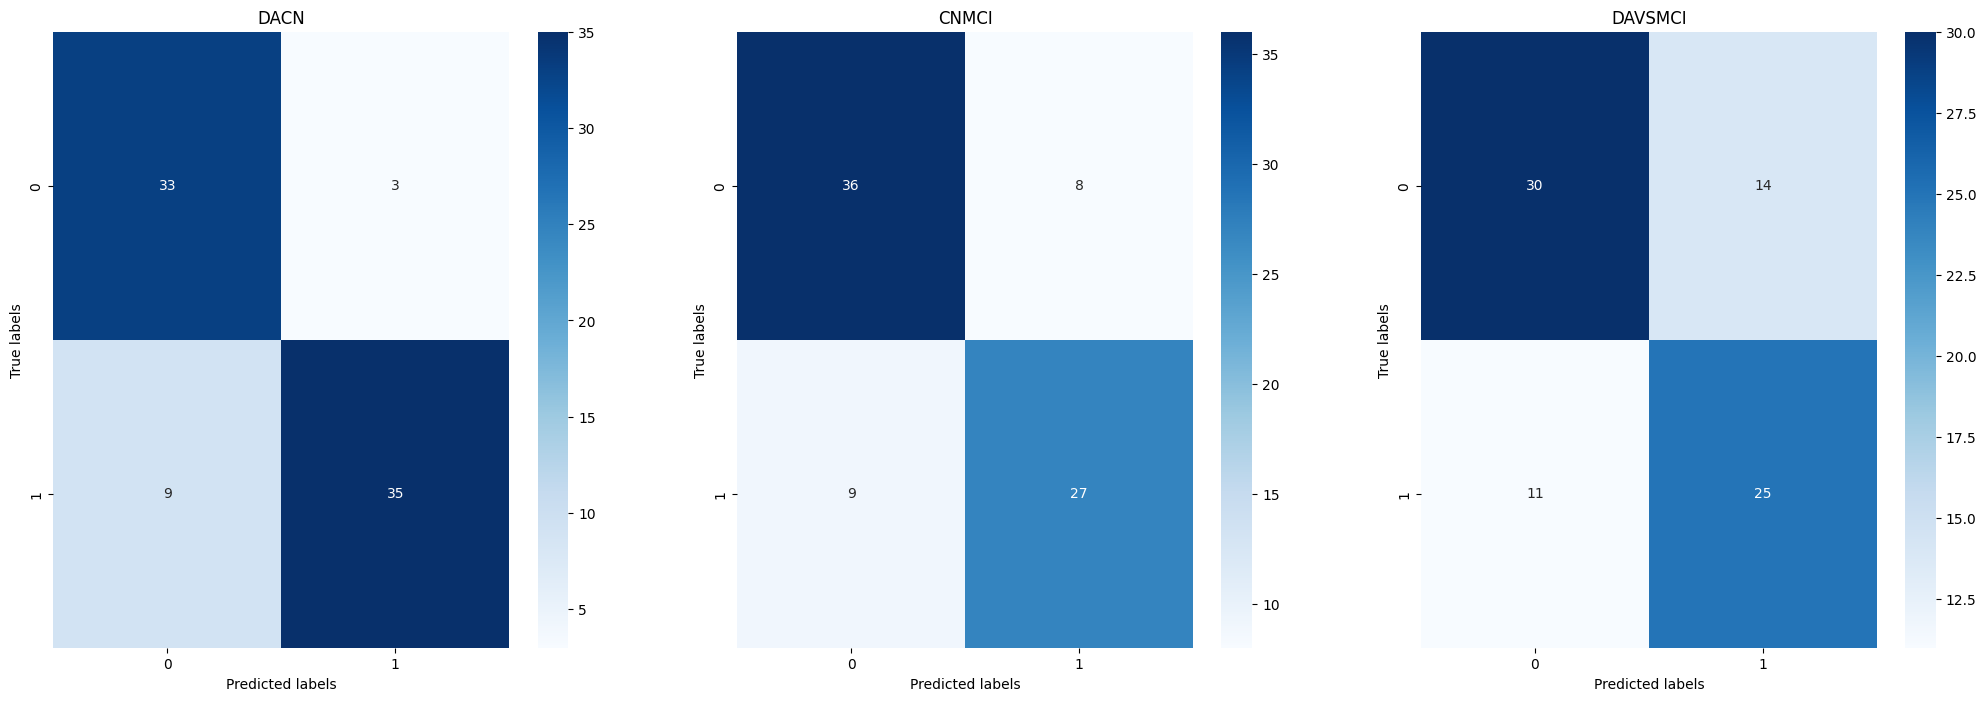

In [51]:
plt.figure(figsize=(25,8))

# Plot the confusion matrices
plt.subplot(1,3,1)
print(cm_dacn)
sns.heatmap(cm_dacn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("DACN")

plt.subplot(1,3,2)
print(cm_cnmci)
sns.heatmap(cm_cnmci, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("CNMCI")

plt.subplot(1,3,3)
print(cm_damci)
sns.heatmap(cm_damci, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("DAVSMCI")

In [52]:
TP = cm_dacn[1][1]
FP = cm_dacn[0][1]
FN = cm_dacn[1][0]
TN = cm_dacn[0][0]
print("DACN")
metric_calculate(TP, FP, FN, TN)

TP = cm_cnmci[1][1]
FP = cm_cnmci[0][1]
FN = cm_cnmci[1][0]
TN = cm_cnmci[0][0]
print("\nCNMCI")
metric_calculate(TP, FP, FN, TN)

TP = cm_damci[1][1]
FP = cm_damci[0][1]
FN = cm_damci[1][0]
TN = cm_damci[0][0]
print("\nDAVSMCI")
metric_calculate(TP, FP, FN, TN)

DACN
Accuracy:  85.0 %
Precision:  92.11 %
Recall:  79.55 %
F1 Score:  85.37 %

CNMCI
Accuracy:  78.75 %
Precision:  77.14 %
Recall:  75.0 %
F1 Score:  76.06 %

DAVSMCI
Accuracy:  68.75 %
Precision:  64.1 %
Recall:  69.44 %
F1 Score:  66.67 %


The results show us that the Neural Network model has strong performance on the DACN dataset, while the performance on the CNMCI and DAVSMCI datasets decreases, particularly in terms of precision, recall and overall accuracy.

## Models for a merged dataset

In [53]:
#Merging the data
X_merged = pd.concat([X_dacn, X_cnmci, X_damci], ignore_index=True)
X_merged.fillna(0, inplace=True)
y_merged = pd.concat([y_dacn, y_cnmci, y_damci], ignore_index=True)

In [54]:
#Train-test split
X_train_merged, X_test_merged, y_train_merged, y_test_merged = train_test_split(X_merged, y_merged, test_size=0.2, random_state=42)

##### Function for metrics calculation

In [55]:
def metrics_calculation(y_test, predictions):
    precision = precision_score(y_test, predictions, average=None,zero_division=1)
    recall = recall_score(y_test, predictions, average=None,zero_division=1)
    f1 = f1_score(y_test, predictions, average=None,zero_division=1)
    for class_label in range(len(precision)):
        print(f"Class {class_label}:")
        print("  Precision:", round(precision[class_label],2)*100, "%")
        print("  Recall:", round(recall[class_label],2)*100, "%")
        print("  F1 Score:", round(f1[class_label],2)*100, "%")
    print()
    overall_precision = precision_score(y_test, predictions, average='weighted',zero_division=1)
    overall_recall = recall_score(y_test, predictions, average='weighted',zero_division=1)
    overall_f1 = f1_score(y_test, predictions, average='weighted',zero_division=1)

    print("Overall Precision:", round(overall_precision,2)*100, "%")
    print("Overall Recall:", round(overall_recall,2)*100, "%")
    print("Overall F1 Score:", round(overall_f1,2)*100, "%")

#### KNN

In [56]:
knn = KNeighborsClassifier(n_neighbors=3)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_merged)
X_test_scaled = scaler.transform(X_test_merged)

knn.fit(X_train_scaled, y_train_merged)
y_pred_merged = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test_merged, y_pred_merged)
print("Accuracy:", round(accuracy,2)*100, "%")

Accuracy: 92.0 %


The KNN model performs well in classifying instances from merged datasets.

[[80  1  2]
 [ 1 78  5]
 [ 5  5 63]]


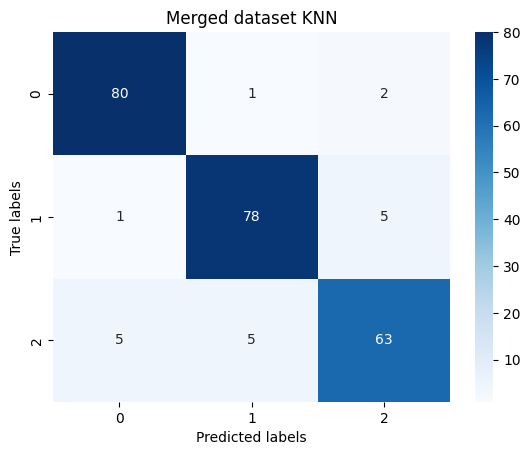

In [57]:
cm = confusion_matrix(y_test_merged, y_pred_merged)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Merged dataset KNN')
plt.show()

In [58]:
metrics_calculation(y_test_merged, y_pred_merged)

Class 0:
  Precision: 93.0 %
  Recall: 96.0 %
  F1 Score: 95.0 %
Class 1:
  Precision: 93.0 %
  Recall: 93.0 %
  F1 Score: 93.0 %
Class 2:
  Precision: 90.0 %
  Recall: 86.0 %
  F1 Score: 88.0 %

Overall Precision: 92.0 %
Overall Recall: 92.0 %
Overall F1 Score: 92.0 %


The precision, recall, and F1 score metrics are calculated for each class individually and averaged across all classes. The KNN classifier demonstrates high precision, recall, and F1 score values across all classes, indicating robust performance in classifying instances from the merged dataset.

#### SVM

##### Linear kernel

In [59]:
svm_linear = SVC(kernel='linear')

svm_linear.fit(X_train_scaled, y_train_merged)
y_pred_merged = svm_linear.predict(X_test_scaled)
svm_accuracy_linear = accuracy_score(y_test_merged, y_pred_merged)
print("SVM Accuracy for linear kernel:", round(svm_accuracy_linear,2)*100, "%")

SVM Accuracy for linear kernel: 82.0 %


[[77  2  4]
 [ 2 65 17]
 [ 8  9 56]]


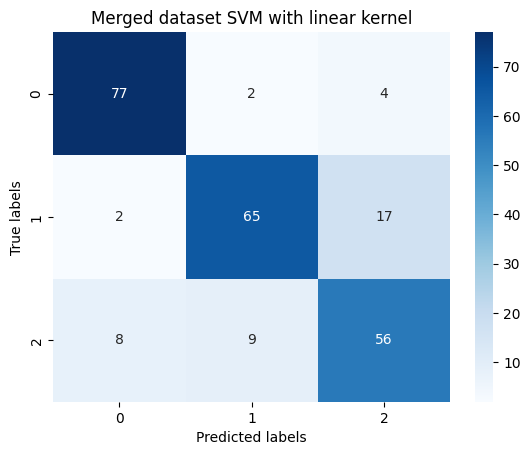

In [60]:
cm = confusion_matrix(y_test_merged, y_pred_merged)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Merged dataset SVM with linear kernel')
plt.show()

In [61]:
metrics_calculation(y_test_merged, y_pred_merged)

Class 0:
  Precision: 89.0 %
  Recall: 93.0 %
  F1 Score: 91.0 %
Class 1:
  Precision: 86.0 %
  Recall: 77.0 %
  F1 Score: 81.0 %
Class 2:
  Precision: 73.0 %
  Recall: 77.0 %
  F1 Score: 75.0 %

Overall Precision: 83.0 %
Overall Recall: 82.0 %
Overall F1 Score: 82.0 %


Based on this, the SVM model with linear kernel achieves decent, but somewhat lower performance results than the KNN model.

##### RBF kernel

In [62]:
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X_train_scaled, y_train_merged)
y_pred_merged = svm_rbf.predict(X_test_scaled)
svm_accuracy_rbf = accuracy_score(y_test_merged, y_pred_merged)
print("SVM Accuracy for RBF kernel:", round(svm_accuracy_rbf,2)*100, "%")

SVM Accuracy for RBF kernel: 85.0 %


SVM with RBF kernel has higher accuracy score than SVM with linear kernel.

[[79  2  2]
 [ 2 71 11]
 [ 9 10 54]]


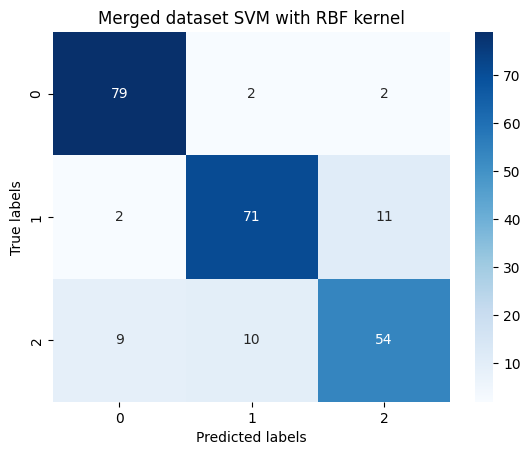

In [63]:
cm = confusion_matrix(y_test_merged, y_pred_merged)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Merged dataset SVM with RBF kernel')
plt.show()

In [64]:
metrics_calculation(y_test_merged, y_pred_merged)

Class 0:
  Precision: 88.0 %
  Recall: 95.0 %
  F1 Score: 91.0 %
Class 1:
  Precision: 86.0 %
  Recall: 85.0 %
  F1 Score: 85.0 %
Class 2:
  Precision: 81.0 %
  Recall: 74.0 %
  F1 Score: 77.0 %

Overall Precision: 85.0 %
Overall Recall: 85.0 %
Overall F1 Score: 85.0 %


According to the results, the SVM model with RBF kernel achieves higher accuracy, precision, recall, F1 score and overall score than the model with linear kernel.

##### Polynomial kernel

In [65]:
svm_poly = SVC(kernel='poly')

svm_poly.fit(X_train_scaled, y_train_merged)
y_pred_merged = svm_poly.predict(X_test_scaled)
svm_accuracy_poly = accuracy_score(y_test_merged, y_pred_merged)
print("SVM Accuracy for polynomial kernel:", round(svm_accuracy_poly,2)*100, "%")

SVM Accuracy for polynomial kernel: 80.0 %


[[69  7  7]
 [ 1 61 22]
 [ 6  6 61]]


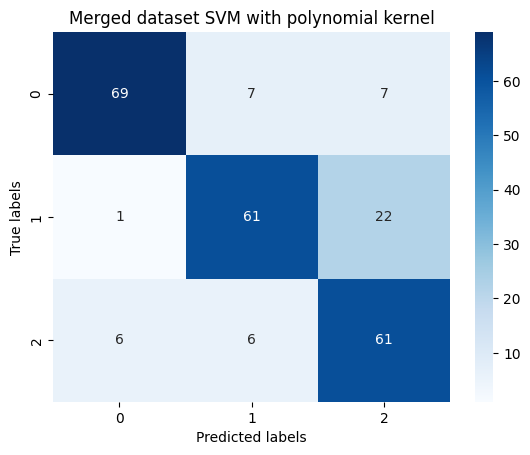

In [66]:
cm = confusion_matrix(y_test_merged, y_pred_merged)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Merged dataset SVM with polynomial kernel')
plt.show()

In [67]:
metrics_calculation(y_test_merged, y_pred_merged)

Class 0:
  Precision: 91.0 %
  Recall: 83.0 %
  F1 Score: 87.0 %
Class 1:
  Precision: 82.0 %
  Recall: 73.0 %
  F1 Score: 77.0 %
Class 2:
  Precision: 68.0 %
  Recall: 84.0 %
  F1 Score: 75.0 %

Overall Precision: 81.0 %
Overall Recall: 80.0 %
Overall F1 Score: 80.0 %


When comparing the SVM model with the polynomial kernel to the SVM models with the linear and RBF kernels, the polynomial kernel SVM achieves an accuracy of 80.0%. This result falls between the accuracies of the linear and RBF kernel SVM models. The SVM with polynomial kernel has the lowest score for classifying instances in Class 1, where the precision, recall and F1 score values are lower than in the models with linear or RBF kernel.

#### Random Forest Classifier

In [68]:
clf = RandomForestClassifier()

clf.fit(X_train_scaled, y_train_merged)
y_pred_merged = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test_merged, y_pred_merged)
print("Accuracy of a Random Forest Classifier:", round(accuracy,2)*100, "%")

Accuracy of a Random Forest Classifier: 92.0 %


[[79  2  2]
 [ 0 77  7]
 [ 1  7 65]]


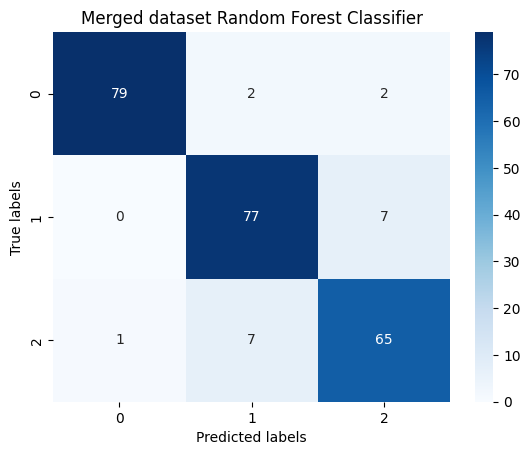

In [69]:
cm = confusion_matrix(y_test_merged, y_pred_merged)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Merged dataset Random Forest Classifier')
plt.show()

In [70]:
metrics_calculation(y_test_merged, y_pred_merged)

Class 0:
  Precision: 99.0 %
  Recall: 95.0 %
  F1 Score: 97.0 %
Class 1:
  Precision: 90.0 %
  Recall: 92.0 %
  F1 Score: 91.0 %
Class 2:
  Precision: 88.0 %
  Recall: 89.0 %
  F1 Score: 88.0 %

Overall Precision: 92.0 %
Overall Recall: 92.0 %
Overall F1 Score: 92.0 %


The Random Forest Classifier achieves an overall accuracy of 92.0% on the merged dataset. The model results in high precision, recall and F1 scores across all classes.

#### Neural Network

In [81]:
y_train_merged_onehot = to_categorical(y_train_merged, num_classes=3)
y_test_merged_onehot = to_categorical(y_test_merged, num_classes=3)
input_size = X_train_merged.shape[1]
print("Input size:", input_size)

Input size: 62


In [82]:
# Defining the MLP architecture
model4 = Sequential([
    Dense(5, activation='relu', input_shape=(input_size,)),  # 5 neurons with ReLU activation
    Dense(5, activation='relu'),   # 5 neurons with ReLU activation
    Dense(3, activation='sigmoid') # Output layer with sigmoid activation function
])

# Compiling the model
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
# Training the model
history = model4.fit(X_train_merged, y_train_merged_onehot, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
27/27 [==============================] - 1s 14ms/step - loss: 1265.2993 - accuracy: 0.4572 - val_loss: 965.0971 - val_accuracy: 0.3750
Epoch 2/10
27/27 [==============================] - 0s 4ms/step - loss: 554.9424 - accuracy: 0.4699 - val_loss: 410.3774 - val_accuracy: 0.3958
Epoch 3/10
27/27 [==============================] - 0s 3ms/step - loss: 263.7356 - accuracy: 0.5382 - val_loss: 325.8415 - val_accuracy: 0.4792
Epoch 4/10
27/27 [==============================] - 0s 5ms/step - loss: 200.3196 - accuracy: 0.5417 - val_loss: 206.6428 - val_accuracy: 0.4167
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 153.1159 - accuracy: 0.5567 - val_loss: 160.6425 - val_accuracy: 0.4271
Epoch 6/10
27/27 [==============================] - 0s 4ms/step - loss: 120.2843 - accuracy: 0.5556 - val_loss: 127.5206 - val_accuracy: 0.4375
Epoch 7/10
27/27 [==============================] - 0s 3ms/step - loss: 105.3581 - accuracy: 0.5347 - val_loss: 143.9807 - val_accurac

8/8 [==============================] - 0s 2ms/step - loss: 64.7111 - accuracy: 0.5083
Test Accuracy: 51.0 %


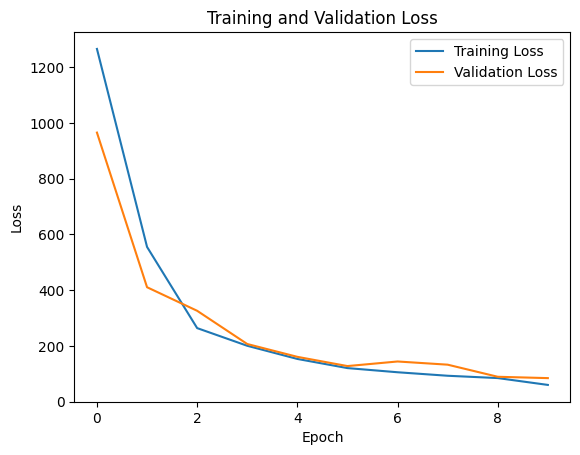

In [84]:
# Evaluating the model
loss, accuracy = model4.evaluate(X_test_merged, y_test_merged_onehot)
print("Test Accuracy:", round(accuracy,2)*100, "%")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

8/8 [==============================] - 0s 3ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Confusion Matrix:
[[81  0  2]
 [83  1  0]
 [72  0  1]]


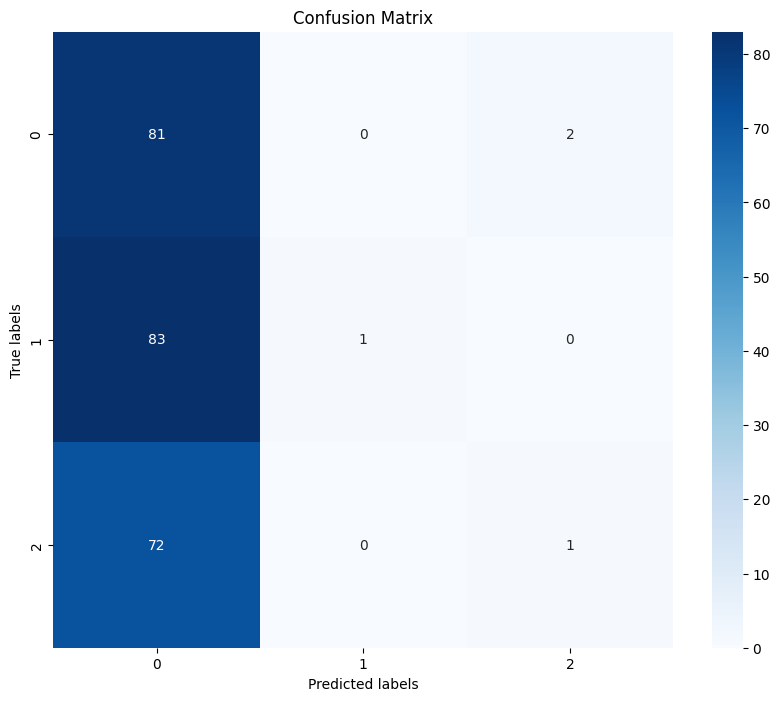

In [77]:
#Get predictions
y_prob_merged = model4.predict(X_test_merged)

# Get the predicted labels
y_pred_merged = np.argmax(y_prob_merged, axis=1)
print(y_pred_merged)

# Confusion matrix
cm = confusion_matrix(y_test_merged, y_pred_merged)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [78]:
metrics_calculation(y_test_merged, y_pred_merged)

Class 0:
  Precision: 34.0 %
  Recall: 98.0 %
  F1 Score: 51.0 %
Class 1:
  Precision: 100.0 %
  Recall: 1.0 %
  F1 Score: 2.0 %
Class 2:
  Precision: 33.0 %
  Recall: 1.0 %
  F1 Score: 3.0 %

Overall Precision: 56.99999999999999 %
Overall Recall: 35.0 %
Overall F1 Score: 19.0 %


The Neural Network model demonstrates some capability in classifying instances across the merged dataset, but its performance is notably lower in comparison to other models such as KNN, SVMs with different kernels and Random Forest Classifier.

### Conclusion

Firstly, in the data preparation step, we see that all 3 datasets, called DACN, CNMCI, and DAMCI, don't have any duplicates or NaN values. Therefore, we moved on to the data visualization part. We made plots for visualizing the disease distribution for all of the datasets. When we look at the DACN dataset, we see that the dataset is well-distributed between Alzheimer and Control cases and they are all balanced. The same goes for CNMCI and DAMCI datasets. The number of cases is distributed equally, indicating that they are all balanced.

Research suggests that the Alzheimer disease is mostly seen within women, which we were able to see in our dataset distributions of disease among the genders. The participant's genders were mostly women, assuming "0" stands for men and "1" stands for women, throughout all 3 datasets. It is also known that age is an important factor for the Nervous System Diseases, since literature shows that the risk is getting higher with aging. Therefore, we also visualized the age distribution and saw that for DACN, the participants' range of age was differentiating between 65-80 for men and 55-80 for women whereas for CNMCI, 65-80 for men and 55-90 for women and lastly for DAMCI, 55-80 for men and 55-90 for women. Research tells us that estrogen may play protective role against Nervous System Diseases, and therefore, risk of Alzheimer for women may get higher after the menopause. Therefore, the participants' range of ages were relevant for a study for Neuronal Diseases.

Our third step was to visualize different model results for the datasets to compare the model's performance. We first checked the KNN model, which gave us high accuracy percentages for all of the datasets. However, accuracy by itself may not be the best metric to consider when evaluating model performance. That is why we later checked the other calculated metrics: RECALL, F1 SCORE and PRECISION. This model gave quite good resultes based on those metrics. The second model was SVM. We tried 3 different kernels for this model: linear, polynomial and RBF kernel. Results indicated that RBF kernel gave the most relevant results with higher percentages for all of the datasets. Random Forest Classifier was used as the third model and the results for accuracy, precision, recall, and F1 score were very good but the problem with this model is the computation cost. The last model was a Neural Network, which gave good results for the individual datasets, but performed badly on the merged dataset. Overall, we can say that the model with the most accurate results for the DACN dataset was SVM with the RBF kernel. For CNMCI the best model was SVM with a linear kernel, and lastly for DAMCI, the best results were obtained by the KNN model. For the merged dataset, the model with overall best performance, was the Random Forest Classifier model.
